In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

import random
import urllib.request
import requests
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings('ignore')

In [33]:
position_stats = pd.read_csv('https://raw.githubusercontent.com/fifa-19-player-stats/data/master/data_sets/FIFA_clean.csv')
position_stats.head()

,Unnamed: 0,id,name,age,photo,nationality,flag,overall,potential,club,...,gkpositioning,gkreflexes,releaseClause,currency,valueAmt,valueUnit,wageAmt,wageUnit,releaseClauseAmt,releaseClauseUnit
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,14.0,8.0,€226.5M,€,110.5,M,565.0,K,226.5,M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,14.0,11.0,€127.1M,€,77.0,M,405.0,K,127.1,M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,15.0,11.0,€228.1M,€,118.5,M,290.0,K,228.1,M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,88.0,94.0,€138.6M,€,72.0,M,260.0,K,138.6,M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,10.0,13.0,€196.4M,€,102.0,M,355.0,K,196.4,M


In [34]:
position_stats.columns

Index(['Unnamed: 0', 'id', 'name', 'age', 'photo', 'nationality', 'flag',
       'overall', 'potential', 'club', 'clubLogo', 'value', 'wage', 'special',
       'preferredFoot', 'internationalReputation', 'weakFoot', 'skillMoves',
       'workRate', 'bodyType', 'realFace', 'position', 'jerseyNumber',
       'joined', 'loanedFrom', 'contractValidUntil', 'height', 'weight', 'ls',
       'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm',
       'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb',
       'lcb', 'cb', 'rcb', 'rb', 'crossing', 'finishing', 'headingaccuracy',
       'shortpassing', 'volleys', 'dribbling', 'curve', 'fkaccuracy',
       'longpassing', 'ballcontrol', 'acceleration', 'sprintspeed', 'agility',
       'reactions', 'balance', 'shotpower', 'jumping', 'stamina', 'strength',
       'longshots', 'aggression', 'interceptions', 'positioning', 'vision',
       'penalties', 'composure', 'marking', 'standingtackle', 'slidingtackle',
       'gkd

In [35]:
position_stats['position'].value_counts()

ST     2152
GK     2025
CB     1778
CM     1394
LB     1322
RB     1291
RM     1124
LM     1095
CAM     958
CDM     948
RCB     662
LCB     648
LCM     395
RCM     391
LW      381
RW      370
RDM     248
LDM     243
LS      207
RS      203
RWB      87
LWB      78
CF       74
LAM      21
RAM      21
RF       16
LF       15
Name: position, dtype: int64

In [36]:
position_stats['position'] = position_stats['position'].map({'ST': 'Striker', 'GK': 'Goal Keeper', 'CB': 'Center Back', 'CM': 'Center Midfielder',
                                                            'LB': 'Left Full Back', 'RB': 'Right Full Back', 'RM': 'Right Midfielder', 'LM': 'Left Midfielder',
                                                            'CAM': 'Center Attacking Midfielder', 'CDM': 'Center Defensive Midfielder', 'RCB': 'Right Center Back', 'LCB': 'Left Center Back',
                                                            'LCM': 'Left Center Midfielder', 'RCM': 'Right Center Midfielder', 'LW': 'Left Winger', 'RW': 'Right Winger', 'RDM': 'Right Defensive Midfielder',
                                                            'LDM': 'Left Defensive Midfielder', 'LS': 'Left Side Player', 'RS': 'Right Side Player', 'RWB': 'Right Wing Back',
                                                            'LWB': 'Left Wing Back', 'CF': 'Center Forward', 'LAM': 'Left Attacking Midfielder', 'RAM': 'Right Attacking Midfielder',
                                                            'RF': 'Right Forward', 'LF': 'Left Forward'})
position_stats.head()

,Unnamed: 0,id,name,age,photo,nationality,flag,overall,potential,club,...,gkpositioning,gkreflexes,releaseClause,currency,valueAmt,valueUnit,wageAmt,wageUnit,releaseClauseAmt,releaseClauseUnit
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,14.0,8.0,€226.5M,€,110.5,M,565.0,K,226.5,M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,14.0,11.0,€127.1M,€,77.0,M,405.0,K,127.1,M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,15.0,11.0,€228.1M,€,118.5,M,290.0,K,228.1,M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,88.0,94.0,€138.6M,€,72.0,M,260.0,K,138.6,M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,10.0,13.0,€196.4M,€,102.0,M,355.0,K,196.4,M


In [37]:
position_stats.to_csv('Position_Stats.csv')

In [38]:
position_rank = ['position', 'id', 'name', 'crossing', 'finishing', 'headingaccuracy',
       'shortpassing', 'volleys', 'dribbling', 'curve', 'fkaccuracy',
       'longpassing', 'ballcontrol', 'acceleration', 'sprintspeed', 'agility',
       'reactions', 'balance', 'shotpower', 'jumping', 'stamina', 'strength',
       'longshots', 'aggression', 'interceptions', 'positioning', 'vision',
       'penalties', 'composure', 'marking', 'standingtackle', 'slidingtackle',
       'gkdiving', 'gkhandling', 'gkkicking', 'gkpositioning', 'gkreflexes']

skills_stats = (position_stats[position_rank])
skills_stats.head()

# position_stats['position'].value_counts()

,position,id,name,crossing,finishing,headingaccuracy,shortpassing,volleys,dribbling,curve,...,penalties,composure,marking,standingtackle,slidingtackle,gkdiving,gkhandling,gkkicking,gkpositioning,gkreflexes
0,Right Forward,158023,L. Messi,84.0,95.0,70.0,90.0,86.0,97.0,93.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,Striker,20801,Cristiano Ronaldo,84.0,94.0,89.0,81.0,87.0,88.0,81.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,Left Winger,190871,Neymar Jr,79.0,87.0,62.0,84.0,84.0,96.0,88.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,Goal Keeper,193080,De Gea,17.0,13.0,21.0,50.0,13.0,18.0,21.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,Right Center Midfielder,192985,K. De Bruyne,93.0,82.0,55.0,92.0,82.0,86.0,85.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [39]:
skills_stats.set_index(['position', 'id'], inplace=True)
skills_stats.head()

,,name,crossing,finishing,headingaccuracy,shortpassing,volleys,dribbling,curve,fkaccuracy,longpassing,...,penalties,composure,marking,standingtackle,slidingtackle,gkdiving,gkhandling,gkkicking,gkpositioning,gkreflexes
position,id,,,,,,,,,,,,,,,,,,,,,
Right Forward,158023,L. Messi,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
Striker,20801,Cristiano Ronaldo,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
Left Winger,190871,Neymar Jr,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
Goal Keeper,193080,De Gea,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
Right Center Midfielder,192985,K. De Bruyne,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [40]:
right_forward = skills_stats.loc['Right Forward']
right_forward.head()

,name,crossing,finishing,headingaccuracy,shortpassing,volleys,dribbling,curve,fkaccuracy,longpassing,...,penalties,composure,marking,standingtackle,slidingtackle,gkdiving,gkhandling,gkkicking,gkpositioning,gkreflexes
id,,,,,,,,,,,,,,,,,,,,,
158023,L. Messi,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
175943,D. Mertens,77.0,86.0,35.0,82.0,70.0,91.0,82.0,79.0,74.0,...,79.0,81.0,25.0,40.0,40.0,7.0,10.0,8.0,10.0,4.0
172114,D. Valeri,78.0,80.0,70.0,79.0,75.0,78.0,80.0,79.0,76.0,...,79.0,83.0,39.0,40.0,30.0,15.0,15.0,8.0,10.0,12.0
150516,L. Podolski,75.0,77.0,66.0,76.0,88.0,78.0,80.0,75.0,67.0,...,83.0,79.0,54.0,39.0,39.0,10.0,9.0,16.0,9.0,9.0
201313,C. Ciano,72.0,70.0,60.0,73.0,67.0,76.0,75.0,76.0,70.0,...,70.0,74.0,24.0,23.0,20.0,9.0,12.0,9.0,9.0,7.0


In [41]:
# Formula for Right Forward ratings. Weighted average of a weighted average.
right_forward1 = round((0.15*right_forward.longshots) + (0.15*right_forward.finishing) + (0.15*right_forward.crossing) + (0.05*right_forward.curve) + (0.05*right_forward.headingaccuracy) + (0.1*right_forward.ballcontrol) + (0.05*right_forward.aggression) + (0.1*right_forward.dribbling) + (0.1*right_forward.shotpower) + (0.1*right_forward.sprintspeed), 2)
right_forward2 = round((0.1*right_forward.interceptions) + (0.15*right_forward.shortpassing) + (0.15*right_forward.jumping) + (0.15*right_forward.reactions) + (0.15*right_forward.stamina) + (0.15*right_forward.slidingtackle) + (0.1*right_forward.acceleration) + (0.05*right_forward.volleys), 2)
right_forward3 = round((0.16*right_forward.agility) + (0.14*right_forward.balance) + (0.1*right_forward.vision) + (0.16*right_forward.positioning) + (0.16*right_forward.longpassing) + (0.14*right_forward.strength) + (0.14*right_forward.composure), 2)
right_forward4 = round((0.33*right_forward.penalties) + (0.33*right_forward.marking) + (0.34*right_forward.standingtackle), 2)
right_forward_total = round((0.4*right_forward1) + (0.3*right_forward2) + (0.2*right_forward3) + (0.1*right_forward4), 2)
best_right_forward = pd.DataFrame(right_forward_total)
best_right_forward.head()

,0
id,
158023,77.74
175943,73.04
172114,70.55
150516,71.39
201313,64.02


In [42]:
# creating a rank column and passing the returned rank series
nums = []
for i in range(1,len(best_right_forward)+1):
    nums.append(i)
best_right_forward['Rank'] = nums
best_right_forward.columns = ['Score', 'Rank']
best_right_forward.sort_values(by=['Score'], inplace=True, ascending=False)
best_right_forward.head(3)
best_right_forward.to_json('Best_Right_Forward.json')
best_right_forward.to_csv('Best_Right_Forward.csv')

In [13]:
left_forward = skills_stats.loc['Left Forward']
left_forward.head()

,name,crossing,finishing,headingaccuracy,shortpassing,volleys,dribbling,curve,fkaccuracy,longpassing,...,penalties,composure,marking,standingtackle,slidingtackle,gkdiving,gkhandling,gkkicking,gkpositioning,gkreflexes
id,,,,,,,,,,,,,,,,,,,,,
183277,E. Hazard,81.0,84.0,61.0,89.0,80.0,95.0,83.0,79.0,83.0,...,86.0,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0
211110,P. Dybala,82.0,84.0,68.0,87.0,88.0,92.0,88.0,88.0,75.0,...,86.0,84.0,23.0,20.0,20.0,5.0,4.0,4.0,5.0,8.0
41,Iniesta,77.0,70.0,54.0,90.0,74.0,90.0,80.0,70.0,85.0,...,71.0,89.0,67.0,57.0,56.0,6.0,13.0,6.0,13.0,7.0
198164,Jonathan Viera,75.0,78.0,41.0,84.0,65.0,84.0,80.0,76.0,78.0,...,74.0,80.0,56.0,68.0,55.0,16.0,16.0,9.0,14.0,9.0
190577,S. Blanco,69.0,69.0,66.0,76.0,76.0,75.0,64.0,60.0,70.0,...,61.0,65.0,30.0,22.0,32.0,9.0,7.0,9.0,13.0,12.0


In [14]:
# Formula for Left Forward ratings. Weighted average of a weighted average.
left_forward1 = round((0.15*left_forward.longshots) + (0.15*left_forward.finishing) + (0.15*left_forward.crossing) + (0.05*left_forward.curve) + (0.05*left_forward.headingaccuracy) + (0.1*left_forward.ballcontrol) + (0.05*left_forward.aggression) + (0.1*left_forward.dribbling) + (0.1*left_forward.shotpower) + (0.1*left_forward.sprintspeed), 2)
left_forward2 = round((0.1*left_forward.interceptions) + (0.15*left_forward.shortpassing) + (0.15*left_forward.jumping) + (0.15*left_forward.reactions) + (0.15*left_forward.stamina) + (0.15*left_forward.slidingtackle) + (0.1*left_forward.acceleration) + (0.05*left_forward.volleys), 2)
left_forward3 = round((0.16*left_forward.agility) + (0.14*left_forward.balance) + (0.1*left_forward.vision) + (0.16*left_forward.positioning) + (0.16*left_forward.longpassing) + (0.14*left_forward.strength) + (0.14*left_forward.composure), 2)
left_forward4 = round((0.33*left_forward.penalties) + (0.33*left_forward.marking) + (0.34*left_forward.standingtackle), 2)
left_forward_total = round((0.4*left_forward1) + (0.3*left_forward2) + (0.2*left_forward3) + (0.1*left_forward4), 2)
best_left_forward = pd.DataFrame(left_forward_total)
best_left_forward.head()

,0
id,
183277,75.74
211110,74.40
41,72.36
198164,75.72
190577,67.21


In [43]:
# creating a rank column and passing the returned rank series
nums = []
for i in range(1,len(best_left_forward)+1):
    nums.append(i)
best_left_forward['Rank'] = nums
best_left_forward.columns = ['Score', 'Rank']
best_left_forward.sort_values(by=['Score'], inplace=True, ascending=False)
best_left_forward.head(3)
best_left_forward.to_json('Best_Left_Forward.json')
best_left_forward.to_csv('Best_Left_Forward.csv')

In [44]:
striker = skills_stats.loc['Striker']
striker.head()

,name,crossing,finishing,headingaccuracy,shortpassing,volleys,dribbling,curve,fkaccuracy,longpassing,...,penalties,composure,marking,standingtackle,slidingtackle,gkdiving,gkhandling,gkkicking,gkpositioning,gkreflexes
id,,,,,,,,,,,,,,,,,,,,,
20801,Cristiano Ronaldo,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
188545,R. Lewandowski,62.0,91.0,85.0,83.0,89.0,85.0,77.0,86.0,65.0,...,88.0,86.0,34.0,42.0,19.0,15.0,6.0,12.0,8.0,10.0
202126,H. Kane,75.0,94.0,85.0,80.0,84.0,80.0,78.0,68.0,82.0,...,90.0,89.0,56.0,36.0,38.0,8.0,10.0,11.0,14.0,11.0
153079,S. Agüero,70.0,93.0,77.0,81.0,85.0,89.0,82.0,73.0,64.0,...,83.0,90.0,30.0,20.0,12.0,13.0,15.0,6.0,11.0,14.0
173731,G. Bale,87.0,86.0,84.0,85.0,85.0,87.0,90.0,87.0,80.0,...,76.0,86.0,54.0,55.0,52.0,15.0,15.0,11.0,5.0,6.0


In [45]:
# Formula for Striker ratings. Weighted average of a weighted average.
striker1 = round((0.05*striker.longshots) + (0.1*striker.finishing) + (0.05*striker.headingaccuracy) + (0.14*striker.ballcontrol) + (0.1*striker.aggression) + (0.13*striker.dribbling) + (0.15*striker.shotpower) + (0.05*striker.slidingtackle) + (0.13*striker.shortpassing) + (0.05*striker.strength) + (0.15*striker.jumping), 2)
striker2 = round((0.14*striker.reactions) + (0.14*striker.stamina) + (0.14*striker.acceleration) + (0.16*striker.volleys) + (0.14*striker.sprintspeed) + (0.16*striker.agility) + (0.14*striker.positioning), 2)
striker3 = round((0.3*striker.curve) + (0.2*striker.balance) + (0.2*striker.vision) + (0.3*striker.composure), 2)
striker4 = round((0.15*striker.penalties) + (0.3*striker.marking) + (0.3*striker.standingtackle) + (0.15*striker.interceptions) + (0.1*striker.longpassing), 2)
striker_total = round((0.4*striker1) + (0.3*striker2) + (0.2*striker3) + (0.1*striker4), 2)
best_striker = pd.DataFrame(striker_total)
best_striker.head()

,0
id,
20801,85.93
188545,82.54
202126,81.92
153079,82.31
173731,85.28


In [46]:
# creating a rank column and passing the returned rank series
nums = []
for i in range(1,len(best_striker)+1):
    nums.append(i)
best_striker['Rank'] = nums
best_striker.columns = ['Score', 'Rank']
best_striker.sort_values(by=['Score'], inplace=True, ascending=False)
best_striker.head(3)
best_striker.to_json('Best_Striker.json')
best_striker.to_csv('Best_Striker.csv')

In [47]:
left_winger = skills_stats.loc['Left Winger']
left_winger.head()

,name,crossing,finishing,headingaccuracy,shortpassing,volleys,dribbling,curve,fkaccuracy,longpassing,...,penalties,composure,marking,standingtackle,slidingtackle,gkdiving,gkhandling,gkkicking,gkpositioning,gkreflexes
id,,,,,,,,,,,,,,,,,,,,,
190871,Neymar Jr,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
198219,L. Insigne,86.0,77.0,56.0,85.0,74.0,90.0,87.0,77.0,78.0,...,61.0,83.0,51.0,24.0,22.0,8.0,4.0,14.0,9.0,10.0
197781,Isco,75.0,79.0,55.0,89.0,65.0,94.0,88.0,76.0,83.0,...,76.0,86.0,60.0,64.0,51.0,10.0,8.0,12.0,15.0,6.0
189242,Coutinho,79.0,79.0,48.0,88.0,75.0,91.0,91.0,86.0,83.0,...,70.0,85.0,55.0,54.0,47.0,12.0,7.0,9.0,14.0,6.0
222492,L. Sané,83.0,81.0,72.0,79.0,85.0,88.0,82.0,68.0,64.0,...,71.0,78.0,36.0,32.0,35.0,8.0,12.0,9.0,9.0,14.0


In [48]:
# Formula for Left Winger ratings. Weighted average of a weighted average.
left_winger1 = round((0.15*left_winger.longshots) + (0.15*left_winger.finishing) + (0.15*left_winger.crossing) + (0.05*left_winger.curve) + (0.05*left_winger.headingaccuracy) + (0.1*left_winger.ballcontrol) + (0.05*left_winger.aggression) + (0.1*left_winger.dribbling) + (0.1*left_winger.shotpower) + (0.1*left_winger.sprintspeed), 2)
left_winger2 = round((0.1*left_winger.interceptions) + (0.15*left_winger.shortpassing) + (0.15*left_winger.jumping) + (0.15*left_winger.reactions) + (0.15*left_winger.stamina) + (0.15*left_winger.slidingtackle) + (0.1*left_winger.acceleration) + (0.05*left_winger.volleys), 2)
left_winger3 = round((0.16*left_winger.agility) + (0.14*left_winger.balance) + (0.1*left_winger.vision) + (0.16*left_winger.positioning) + (0.16*left_winger.longpassing) + (0.14*left_winger.strength) + (0.14*left_winger.composure), 2)
left_winger4 = round((0.33*left_winger.penalties) + (0.33*left_winger.marking) + (0.34*left_winger.standingtackle), 2)
left_winger_total = round((0.4*left_winger1) + (0.3*left_winger2) + (0.2*left_winger3) + (0.1*left_winger4), 2)
best_left_winger = pd.DataFrame(left_winger_total)
best_left_winger.head()

,0
id,
190871,75.38
198219,71.71
197781,75.46
189242,76.69
222492,73.54


In [49]:
# creating a rank column and passing the returned rank series
nums = []
for i in range(1,len(best_left_winger)+1):
    nums.append(i)
best_left_winger['Rank'] = nums
best_left_winger.columns = ['Score', 'Rank']
best_left_winger.sort_values(by=['Score'], inplace=True, ascending=False)
best_left_winger.head(3)
best_left_winger.to_json('Best_Left_Winger.json')
best_left_winger.to_csv('Best_Left_Winger.csv')

In [50]:
keeper = skills_stats.loc['Goal Keeper']
keeper.head()

,name,crossing,finishing,headingaccuracy,shortpassing,volleys,dribbling,curve,fkaccuracy,longpassing,...,penalties,composure,marking,standingtackle,slidingtackle,gkdiving,gkhandling,gkkicking,gkpositioning,gkreflexes
id,,,,,,,,,,,,,,,,,,,,,
193080,De Gea,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
200389,J. Oblak,13.0,11.0,15.0,29.0,13.0,12.0,13.0,14.0,26.0,...,11.0,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0
192448,M. ter Stegen,15.0,14.0,11.0,36.0,14.0,17.0,18.0,12.0,42.0,...,25.0,69.0,25.0,13.0,10.0,87.0,85.0,88.0,85.0,90.0
192119,T. Courtois,14.0,14.0,13.0,33.0,12.0,13.0,19.0,20.0,35.0,...,27.0,66.0,20.0,18.0,16.0,85.0,91.0,72.0,86.0,88.0
167495,M. Neuer,15.0,13.0,25.0,55.0,11.0,30.0,14.0,11.0,59.0,...,47.0,70.0,17.0,10.0,11.0,90.0,86.0,91.0,87.0,87.0


In [51]:
# Formula for Goal Keeper ratings. Weighted average of a weighted average.
keeper_rating1 = round((0.15*keeper.gkdiving) + (0.25*keeper.gkhandling) + (0.1*keeper.gkkicking) + (0.2*keeper.gkpositioning) + (0.2*keeper.gkreflexes) + (0.1*keeper.reactions), 2)
keeper_rating2 = round((0.2*keeper.fkaccuracy) + (0.1*keeper.jumping) + (0.15*keeper.ballcontrol) + (0.15*keeper.dribbling) + (0.3*keeper.shortpassing) + (0.1*keeper.positioning), 2)
keeper_rating3 = round((0.3*keeper.agility) + (0.15*keeper.balance) + (0.1*keeper.vision) + (0.3*keeper.aggression) + (0.15*keeper.strength), 2)
keeper_rating4 = round((0.15*keeper.interceptions) + (0.2*keeper.stamina) + (0.2*keeper.composure) + (0.05*keeper.penalties) + (0.25*keeper.slidingtackle) + (0.15*keeper.curve), 2)
keeper_total = round((0.4*keeper_rating1) + (0.3*keeper_rating2) + (0.2*keeper_rating3) + (0.1*keeper_rating4), 2)
best_keeper = pd.DataFrame(keeper_total)
best_keeper.head()

,0
id,
193080,60.21
200389,56.88
192448,55.77
192119,55.08
167495,59.79


In [52]:
# creating a rank column and passing the returned rank series
nums = []
for i in range(1,len(best_keeper)+1):
    nums.append(i)
best_keeper['Rank'] = nums
best_keeper.columns = ['Score', 'Rank']
best_keeper.sort_values(by=['Score'], inplace=True, ascending=False)
best_keeper.head(3)
best_keeper.to_json('Best_Keeper.json')
best_keeper.to_csv('Best_Keeper.csv')

In [53]:
center_back = skills_stats.loc['Center Back']
center_back.head()

,name,crossing,finishing,headingaccuracy,shortpassing,volleys,dribbling,curve,fkaccuracy,longpassing,...,penalties,composure,marking,standingtackle,slidingtackle,gkdiving,gkhandling,gkkicking,gkpositioning,gkreflexes
id,,,,,,,,,,,,,,,,,,,,,
182493,D. Godín,55.0,42.0,92.0,79.0,47.0,53.0,49.0,51.0,70.0,...,50.0,82.0,90.0,89.0,89.0,6.0,8.0,15.0,5.0,15.0
205600,S. Umtiti,69.0,51.0,79.0,81.0,70.0,69.0,72.0,62.0,73.0,...,61.0,82.0,90.0,89.0,86.0,15.0,10.0,14.0,12.0,15.0
177509,M. Benatia,45.0,47.0,83.0,65.0,44.0,64.0,34.0,27.0,65.0,...,41.0,82.0,89.0,87.0,85.0,7.0,4.0,8.0,7.0,11.0
192366,N. Otamendi,52.0,54.0,85.0,75.0,57.0,51.0,50.0,39.0,72.0,...,45.0,80.0,83.0,85.0,84.0,12.0,5.0,8.0,11.0,12.0
171919,Naldo,45.0,57.0,94.0,76.0,60.0,60.0,52.0,76.0,70.0,...,60.0,84.0,86.0,88.0,85.0,14.0,10.0,14.0,8.0,14.0


In [54]:
# Formula for Center Back ratings. Weighted average of a weighted average.
center_back1 = round((0.05*center_back.fkaccuracy) + (0.1*center_back.interceptions) + (0.1*center_back.stamina) + (0.05*center_back.positioning) + (0.1*center_back.slidingtackle) + (0.1*center_back.ballcontrol) + (0.15*center_back.aggression) + (0.05*center_back.sprintspeed) + (0.1*center_back.strength) + (0.1*center_back.longpassing), 2)
center_back2 = round((0.06*center_back.shortpassing) + (0.18*center_back.agility) + (0.18*center_back.acceleration) + (0.18*center_back.curve) + (0.1*center_back.headingaccuracy) + (0.1*center_back.dribbling) + (0.2*center_back.marking), 2)
center_back3 = round((0.15*center_back.balance) + (0.2*center_back.vision) + (0.3*center_back.composure) + (0.35*center_back.reactions), 2)
center_back4 = round((0.35*center_back.penalties) + (0.32*center_back.standingtackle) + (0.33*center_back.volleys), 2)
center_back_total = round((0.5*center_back1) + (0.25*center_back2) + (0.15*center_back3) + (0.1*center_back4), 2)
best_center_back = pd.DataFrame(center_back_total)
best_center_back.head()

,0
id,
182493,68.96
205600,72.57
177509,65.43
192366,66.73
171919,66.87


In [55]:
# creating a rank column and passing the returned rank series
nums = []
for i in range(1,len(best_center_back)+1):
    nums.append(i)
best_center_back['Rank'] = nums
best_center_back.columns = ['Score', 'Rank']
best_center_back.sort_values(by=['Score'], inplace=True, ascending=False)
best_center_back.head(3)
best_center_back.to_json('Best_Center_Back.json')
best_center_back.to_csv('Best_Center_Back.csv')

In [128]:
center_midfielder = skills_stats.loc['Center Midfielder']
center_midfielder.head()

,name,crossing,finishing,headingaccuracy,shortpassing,volleys,dribbling,curve,fkaccuracy,longpassing,...,penalties,composure,marking,standingtackle,slidingtackle,gkdiving,gkhandling,gkkicking,gkpositioning,gkreflexes
id,,,,,,,,,,,,,,,,,,,,,
189509,Thiago,72.0,69.0,54.0,90.0,90.0,90.0,85.0,77.0,87.0,...,75.0,85.0,67.0,63.0,65.0,6.0,11.0,7.0,9.0,13.0
223848,S. Milinković-Savić,64.0,80.0,86.0,85.0,74.0,86.0,78.0,75.0,85.0,...,56.0,82.0,75.0,77.0,72.0,7.0,10.0,7.0,16.0,7.0
205498,Jorginho,75.0,57.0,56.0,89.0,71.0,82.0,75.0,76.0,87.0,...,84.0,79.0,63.0,78.0,70.0,14.0,7.0,13.0,14.0,8.0
186942,I. Gündoğan,74.0,73.0,50.0,88.0,75.0,85.0,81.0,74.0,83.0,...,76.0,87.0,73.0,68.0,64.0,11.0,14.0,5.0,5.0,13.0
220971,N. Keïta,62.0,74.0,42.0,88.0,71.0,88.0,64.0,70.0,78.0,...,58.0,79.0,68.0,62.0,61.0,7.0,14.0,15.0,14.0,9.0


In [129]:
# Formula for Center Midfielder ratings. Weighted average of a weighted average.
center_midfielder1 = round((0.15*center_midfielder.ballcontrol) + (0.14*center_midfielder.stamina) + (0.15*center_midfielder.aggression) + (0.05*center_midfielder.strength) + (0.1*center_midfielder.dribbling) + (0.04*center_midfielder.headingaccuracy) + (0.08*center_midfielder.sprintspeed) + (0.15*center_midfielder.acceleration) + (0.14*center_midfielder.shotpower), 2)
center_midfielder2 = round((0.05*center_midfielder.jumping) + (0.2*center_midfielder.interceptions) + (0.07*center_midfielder.shortpassing) + (0.2*center_midfielder.slidingtackle) + (0.08*center_midfielder.longpassing) + (0.18*center_midfielder.marking) + (0.22*center_midfielder.longshots), 2)
center_midfielder3 = round((0.1*center_midfielder.reactions) + (0.25*center_midfielder.agility) + (0.1*center_midfielder.balance) + (0.1*center_midfielder.vision) + (0.1*center_midfielder.positioning) + (0.25*center_midfielder.curve) + (0.1*center_midfielder.volleys), 2)
center_midfielder4 = round((0.15*center_midfielder.composure) + (0.3*center_midfielder.penalties) + (0.3*center_midfielder.finishing) + (0.25*center_midfielder.standingtackle), 2)
center_midfielder_total = round((0.4*center_midfielder1) + (0.3*center_midfielder2) + (0.2*center_midfielder3) + (0.1*center_midfielder4), 2)
best_center_midfielder = pd.DataFrame(center_midfielder_total)
best_center_midfielder.head()

,0
id,
189509,76.69
223848,77.31
205498,74.48
186942,74.83
220971,74.23


In [130]:
# creating a rank column and passing the returned rank series
nums = []
for i in range(1,len(best_center_midfielder)+1):
    nums.append(i)
best_center_midfielder['Rank'] = nums
best_center_midfielder.columns = ['Score', 'Rank']
best_center_midfielder.sort_values(by=['Score'], inplace=True, ascending=False)
best_center_midfielder.head(20)
best_center_midfielder.to_json('Best_Center_Midfielder.json')
best_center_midfielder.to_csv('Best_Center_Midfielder.csv') # Needed for Plotly

In [59]:
left_full_back = skills_stats.loc['Left Full Back']
left_full_back.head()

,name,crossing,finishing,headingaccuracy,shortpassing,volleys,dribbling,curve,fkaccuracy,longpassing,...,penalties,composure,marking,standingtackle,slidingtackle,gkdiving,gkhandling,gkkicking,gkpositioning,gkreflexes
id,,,,,,,,,,,,,,,,,,,,,
176676,Marcelo,90.0,70.0,75.0,84.0,54.0,90.0,85.0,67.0,76.0,...,59.0,86.0,71.0,85.0,86.0,12.0,5.0,5.0,5.0,9.0
189332,Jordi Alba,87.0,73.0,70.0,84.0,60.0,80.0,80.0,63.0,74.0,...,59.0,79.0,72.0,84.0,85.0,13.0,15.0,13.0,6.0,13.0
191043,Alex Sandro,84.0,55.0,76.0,81.0,68.0,80.0,78.0,59.0,71.0,...,60.0,82.0,81.0,84.0,84.0,7.0,7.0,9.0,12.0,5.0
197445,D. Alaba,81.0,63.0,75.0,82.0,68.0,79.0,78.0,84.0,80.0,...,80.0,79.0,80.0,82.0,80.0,5.0,7.0,14.0,15.0,9.0
164169,Filipe Luís,86.0,59.0,72.0,80.0,56.0,77.0,74.0,75.0,77.0,...,65.0,88.0,78.0,84.0,86.0,11.0,15.0,9.0,9.0,5.0


In [60]:
# Formula for Left Full Back ratings. Weighted average of a weighted average.
left_full_back1 = round((0.1*left_full_back.fkaccuracy) + (0.2*left_full_back.interceptions) + (0.15*left_full_back.positioning) + (0.15*left_full_back.slidingtackle) + (0.15*left_full_back.ballcontrol) + (0.1*left_full_back.crossing) + (0.15*left_full_back.aggression), 2)
left_full_back2 = round((0.1*left_full_back.shortpassing) + (0.2*left_full_back.stamina) + (0.14*left_full_back.acceleration) + (0.2*left_full_back.longpassing) + (0.12*left_full_back.dribbling) + (0.14*left_full_back.marking) + (0.1*left_full_back.reactions), 2)
left_full_back3 = round((0.05*left_full_back.balance) + (0.25*left_full_back.agility) + (0.1*left_full_back.vision) + (0.1*left_full_back.composure) + (0.2*left_full_back.curve) + (0.3*left_full_back.strength), 2)
left_full_back4 = round((0.2*left_full_back.penalties) + (0.2*left_full_back.standingtackle) + (0.2*left_full_back.volleys) + (0.2*left_full_back.sprintspeed) + (0.2*left_full_back.headingaccuracy), 2)
left_full_back_total = round((0.5*left_full_back1) + (0.25*left_full_back2) + (0.15*left_full_back3) + (0.1*left_full_back4), 2)
best_left_full_back = pd.DataFrame(left_full_back_total)
best_left_full_back.head()

,0
id,
176676,82.66
189332,79.44
191043,78.74
197445,79.42
164169,78.89


In [61]:
# creating a rank column and passing the returned rank series
nums = []
for i in range(1,len(best_left_full_back)+1):
    nums.append(i)
best_left_full_back['Rank'] = nums
best_left_full_back.columns = ['Score', 'Rank']
best_left_full_back.sort_values(by=['Score'], inplace=True, ascending=False)
best_left_full_back.head(3)
best_left_full_back.to_json('Best_Left_Full_Back.json')
best_left_full_back.to_csv('Best_Left_Full_Back.csv')

In [62]:
right_full_back = skills_stats.loc['Right Full Back']
right_full_back.head()

,name,crossing,finishing,headingaccuracy,shortpassing,volleys,dribbling,curve,fkaccuracy,longpassing,...,penalties,composure,marking,standingtackle,slidingtackle,gkdiving,gkhandling,gkkicking,gkpositioning,gkreflexes
id,,,,,,,,,,,,,,,,,,,,,
184432,Azpilicueta,81.0,46.0,76.0,81.0,51.0,69.0,68.0,58.0,80.0,...,66.0,78.0,88.0,90.0,86.0,13.0,9.0,10.0,6.0,5.0
204963,Carvajal,83.0,41.0,70.0,81.0,34.0,76.0,72.0,47.0,71.0,...,45.0,77.0,83.0,83.0,85.0,13.0,13.0,15.0,9.0,15.0
188377,K. Walker,81.0,51.0,74.0,78.0,57.0,79.0,76.0,71.0,67.0,...,63.0,75.0,78.0,84.0,83.0,12.0,6.0,16.0,15.0,8.0
199564,Sergi Roberto,85.0,63.0,72.0,86.0,50.0,78.0,74.0,60.0,78.0,...,57.0,76.0,75.0,83.0,83.0,14.0,16.0,11.0,15.0,10.0
177457,L. Bender,69.0,59.0,78.0,79.0,57.0,72.0,49.0,47.0,74.0,...,52.0,83.0,88.0,86.0,82.0,12.0,6.0,7.0,12.0,7.0


In [63]:
# Formula for Right Full Back ratings. Weighted average of a weighted average.
right_full_back1 = round((0.1*right_full_back.fkaccuracy) + (0.2*right_full_back.interceptions) + (0.15*right_full_back.positioning) + (0.15*right_full_back.slidingtackle) + (0.15*right_full_back.ballcontrol) + (0.1*right_full_back.crossing) + (0.15*right_full_back.aggression), 2)
right_full_back2 = round((0.1*right_full_back.shortpassing) + (0.2*right_full_back.stamina) + (0.14*right_full_back.acceleration) + (0.2*right_full_back.longpassing) + (0.12*right_full_back.dribbling) + (0.14*right_full_back.marking) + (0.1*right_full_back.reactions), 2)
right_full_back3 = round((0.05*right_full_back.balance) + (0.25*right_full_back.agility) + (0.1*right_full_back.vision) + (0.1*right_full_back.composure) + (0.2*right_full_back.curve) + (0.3*right_full_back.strength), 2)
right_full_back4 = round((0.2*right_full_back.penalties) + (0.2*right_full_back.standingtackle) + (0.2*right_full_back.volleys) + (0.2*right_full_back.sprintspeed) + (0.2*right_full_back.headingaccuracy), 2)
right_full_back_total = round((0.5*right_full_back1) + (0.25*right_full_back2) + (0.15*right_full_back3) + (0.1*right_full_back4), 2)
best_right_full_back = pd.DataFrame(right_full_back_total)
best_right_full_back.head()

,0
id,
184432,77.20
204963,75.28
188377,76.87
199564,75.74
177457,73.86


In [64]:
# creating a rank column and passing the returned rank series
nums = []
for i in range(1,len(best_right_full_back)+1):
    nums.append(i)
best_right_full_back['Rank'] = nums
best_right_full_back.columns = ['Score', 'Rank']
best_right_full_back.sort_values(by=['Score'], inplace=True, ascending=False)
best_right_full_back.head(3)
best_right_full_back.to_json('Best_Right_Full_Back.json')
best_right_full_back.to_csv('Best_Right_Full_Back.csv')

In [65]:
right_midfielder = skills_stats.loc['Right Midfielder']
right_midfielder.head()

,name,crossing,finishing,headingaccuracy,shortpassing,volleys,dribbling,curve,fkaccuracy,longpassing,...,penalties,composure,marking,standingtackle,slidingtackle,gkdiving,gkhandling,gkkicking,gkpositioning,gkreflexes
id,,,,,,,,,,,,,,,,,,,,,
231747,K. Mbappé,77.0,88.0,77.0,82.0,78.0,90.0,77.0,63.0,73.0,...,70.0,86.0,34.0,34.0,32.0,13.0,5.0,7.0,11.0,6.0
209331,M. Salah,78.0,90.0,59.0,82.0,73.0,89.0,83.0,60.0,72.0,...,61.0,91.0,38.0,43.0,41.0,14.0,14.0,9.0,11.0,14.0
204970,F. Thauvin,83.0,81.0,75.0,83.0,74.0,85.0,86.0,72.0,76.0,...,74.0,82.0,46.0,29.0,31.0,8.0,11.0,14.0,10.0,9.0
185020,José Callejón,82.0,78.0,65.0,80.0,84.0,82.0,73.0,65.0,51.0,...,62.0,79.0,64.0,32.0,32.0,8.0,5.0,14.0,11.0,11.0
183898,A. Di María,83.0,72.0,51.0,82.0,77.0,86.0,84.0,82.0,79.0,...,73.0,82.0,35.0,59.0,56.0,10.0,7.0,11.0,12.0,11.0


In [66]:
# Formula for Right Midfielder ratings. Weighted average of a weighted average.
right_midfielder1 = round((0.15*right_midfielder.crossing) + (0.2*right_midfielder.ballcontrol) + (0.2*right_midfielder.stamina) + (0.1*right_midfielder.curve) + (0.1*right_midfielder.dribbling) + (0.1*right_midfielder.marking) + (0.1*right_midfielder.longshots) + (0.05*right_midfielder.slidingtackle), 2)
right_midfielder2 = round((0.12*right_midfielder.acceleration) + (0.23*right_midfielder.interceptions) + (0.25*right_midfielder.shotpower) + (0.15*right_midfielder.strength) + (0.15*right_midfielder.longpassing) + (0.1*right_midfielder.positioning), 2)
right_midfielder3 = round((0.05*right_midfielder.jumping) + (0.05*right_midfielder.reactions) + (0.2*right_midfielder.aggression) + (0.1*right_midfielder.agility) + (0.1*right_midfielder.balance) + (0.1*right_midfielder.shortpassing) + (0.1*right_midfielder.sprintspeed) + (0.15*right_midfielder.headingaccuracy) + (0.1*right_midfielder.vision) + (0.05*right_midfielder.volleys), 2)
right_midfielder4 = round((0.15*right_midfielder.composure) + (0.35*right_midfielder.penalties) + (0.2*right_midfielder.finishing) + (0.3*right_midfielder.standingtackle), 2)
right_midfielder_total = round((0.4*right_midfielder1) + (0.3*right_midfielder2) + (0.2*right_midfielder3) + (0.1*right_midfielder4), 2)
best_right_midfielder = pd.DataFrame(right_midfielder_total)
best_right_midfielder.head()

,0
id,
231747,73.87
209331,74.90
204970,73.34
185020,71.40
183898,72.72


In [67]:
# creating a rank column and passing the returned rank series
nums = []
for i in range(1,len(best_right_midfielder)+1):
    nums.append(i)
best_right_midfielder['Rank'] = nums
best_right_midfielder.columns = ['Score', 'Rank']
best_right_midfielder.sort_values(by=['Score'], inplace=True, ascending=False)
best_right_midfielder.head(3)
best_right_midfielder.to_json('Best_Right_Midfielder.json')
best_right_midfielder.to_csv('Best_Right_Midfielder.csv')

In [68]:
left_midfielder = skills_stats.loc['Left Midfielder']
left_midfielder.head()

,name,crossing,finishing,headingaccuracy,shortpassing,volleys,dribbling,curve,fkaccuracy,longpassing,...,penalties,composure,marking,standingtackle,slidingtackle,gkdiving,gkhandling,gkkicking,gkpositioning,gkreflexes
id,,,,,,,,,,,,,,,,,,,,,
188567,P. Aubameyang,77.0,88.0,79.0,77.0,86.0,79.0,80.0,74.0,64.0,...,76.0,86.0,27.0,25.0,36.0,6.0,9.0,15.0,9.0,9.0
208722,S. Mané,73.0,84.0,62.0,79.0,71.0,87.0,74.0,64.0,71.0,...,71.0,80.0,42.0,42.0,38.0,10.0,10.0,15.0,7.0,14.0
190483,Douglas Costa,84.0,67.0,50.0,84.0,76.0,92.0,84.0,78.0,68.0,...,77.0,84.0,45.0,38.0,34.0,13.0,15.0,9.0,12.0,5.0
188350,M. Reus,79.0,87.0,49.0,86.0,90.0,87.0,89.0,84.0,75.0,...,89.0,84.0,47.0,36.0,45.0,12.0,12.0,13.0,13.0,11.0
193747,Koke,86.0,72.0,61.0,90.0,56.0,82.0,85.0,76.0,89.0,...,59.0,78.0,80.0,69.0,51.0,14.0,12.0,5.0,10.0,13.0


In [69]:
# Formula for Left Midfielder ratings. Weighted average of a weighted average.
left_midfielder1 = round((0.15*left_midfielder.crossing) + (0.2*left_midfielder.ballcontrol) + (0.2*left_midfielder.stamina) + (0.1*left_midfielder.curve) + (0.1*left_midfielder.dribbling) + (0.1*left_midfielder.marking) + (0.1*left_midfielder.longshots) + (0.05*left_midfielder.slidingtackle), 2)
left_midfielder2 = round((0.12*left_midfielder.acceleration) + (0.23*left_midfielder.interceptions) + (0.25*left_midfielder.shotpower) + (0.15*left_midfielder.strength) + (0.15*left_midfielder.longpassing) + (0.1*left_midfielder.positioning), 2)
left_midfielder3 = round((0.05*left_midfielder.jumping) + (0.05*left_midfielder.reactions) + (0.2*left_midfielder.aggression) + (0.1*left_midfielder.agility) + (0.1*left_midfielder.balance) + (0.1*left_midfielder.shortpassing) + (0.1*left_midfielder.sprintspeed) + (0.15*left_midfielder.headingaccuracy) + (0.1*left_midfielder.vision) + (0.05*left_midfielder.volleys), 2)
left_midfielder4 = round((0.15*left_midfielder.composure) + (0.35*left_midfielder.penalties) + (0.2*left_midfielder.finishing) + (0.3*left_midfielder.standingtackle), 2)
left_midfielder_total = round((0.4*left_midfielder1) + (0.3*left_midfielder2) + (0.2*left_midfielder3) + (0.1*left_midfielder4), 2)
best_left_midfielder = pd.DataFrame(left_midfielder_total)
best_left_midfielder.head()

,0
id,
188567,71.36
208722,72.97
190483,73.95
188350,74.47
193747,78.24


In [70]:
# creating a rank column and passing the returned rank series
nums = []
for i in range(1,len(best_left_midfielder)+1):
    nums.append(i)
best_left_midfielder['Rank'] = nums
best_left_midfielder.columns = ['Score', 'Rank']
best_left_midfielder.sort_values(by=['Score'], inplace=True, ascending=False)
best_left_midfielder.head(3)
best_left_midfielder.to_json('Best_Left_Midfielder.json')
best_left_midfielder.to_csv('Best_Left_Midfielder.csv')

In [71]:
center_attacking_midfielder = skills_stats.loc['Center Attacking Midfielder']
center_attacking_midfielder.head()

,name,crossing,finishing,headingaccuracy,shortpassing,volleys,dribbling,curve,fkaccuracy,longpassing,...,penalties,composure,marking,standingtackle,slidingtackle,gkdiving,gkhandling,gkkicking,gkpositioning,gkreflexes
id,,,,,,,,,,,,,,,,,,,,,
194765,A. Griezmann,82.0,90.0,84.0,83.0,87.0,88.0,84.0,78.0,76.0,...,79.0,87.0,59.0,47.0,48.0,14.0,8.0,14.0,13.0,14.0
190460,C. Eriksen,88.0,80.0,52.0,91.0,77.0,84.0,86.0,87.0,88.0,...,67.0,88.0,59.0,57.0,22.0,9.0,14.0,7.0,7.0,6.0
201942,Roberto Firmino,72.0,87.0,77.0,86.0,81.0,87.0,80.0,65.0,75.0,...,72.0,87.0,60.0,64.0,42.0,8.0,11.0,9.0,6.0,10.0
189596,T. Müller,79.0,87.0,82.0,83.0,84.0,75.0,81.0,59.0,72.0,...,60.0,83.0,44.0,41.0,44.0,6.0,7.0,11.0,14.0,14.0
176635,M. Özil,83.0,73.0,54.0,89.0,80.0,84.0,84.0,77.0,82.0,...,67.0,82.0,24.0,16.0,19.0,6.0,14.0,10.0,6.0,14.0


In [72]:
# Formula for Center Attacking Midfielder ratings. Weighted average of a weighted average.
center_attacking_midfielder1 = round((0.15*center_attacking_midfielder.ballcontrol) + (0.14*center_attacking_midfielder.stamina) + (0.15*center_attacking_midfielder.aggression) + (0.05*center_attacking_midfielder.strength) + (0.1*center_attacking_midfielder.dribbling) + (0.04*center_attacking_midfielder.headingaccuracy) + (0.08*center_attacking_midfielder.sprintspeed) + (0.15*center_attacking_midfielder.acceleration) + (0.14*center_attacking_midfielder.shotpower), 2)
center_attacking_midfielder2 = round((0.05*center_attacking_midfielder.jumping) + (0.2*center_attacking_midfielder.interceptions) + (0.07*center_attacking_midfielder.shortpassing) + (0.2*center_attacking_midfielder.slidingtackle) + (0.08*center_attacking_midfielder.longpassing) + (0.18*center_attacking_midfielder.marking) + (0.22*center_attacking_midfielder.longshots), 2)
center_attacking_midfielder3 = round((0.1*center_attacking_midfielder.reactions) + (0.25*center_attacking_midfielder.agility) + (0.1*center_attacking_midfielder.balance) + (0.1*center_attacking_midfielder.vision) + (0.1*center_attacking_midfielder.positioning) + (0.25*center_attacking_midfielder.curve) + (0.1*center_attacking_midfielder.volleys), 2)
center_attacking_midfielder4 = round((0.15*center_attacking_midfielder.composure) + (0.3*center_attacking_midfielder.penalties) + (0.3*center_attacking_midfielder.finishing) + (0.25*center_attacking_midfielder.standingtackle), 2)
center_attacking_midfielder_total = round((0.4*center_attacking_midfielder1) + (0.3*center_attacking_midfielder2) + (0.2*center_attacking_midfielder3) + (0.1*center_attacking_midfielder4), 2)
best_center_attacking_midfielder = pd.DataFrame(center_attacking_midfielder_total)
best_center_attacking_midfielder.head()

,0
id,
194765,76.14
190460,72.58
201942,75.72
189596,71.45
176635,63.48


In [73]:
# creating a rank column and passing the returned rank series
nums = []
for i in range(1,len(best_center_attacking_midfielder)+1):
    nums.append(i)
best_center_attacking_midfielder['Rank'] = nums
best_center_attacking_midfielder.columns = ['Score', 'Rank']
best_center_attacking_midfielder.sort_values(by=['Score'], inplace=True, ascending=False)
best_center_attacking_midfielder.head()
best_center_attacking_midfielder.to_json('Best_Center_Attacking_Midfielder.json')
best_center_attacking_midfielder.to_csv('Best_Center_Attacking_Midfielder.csv')

In [74]:
center_defensive_midfielder = skills_stats.loc['Center Defensive Midfielder']
center_defensive_midfielder.head()

,name,crossing,finishing,headingaccuracy,shortpassing,volleys,dribbling,curve,fkaccuracy,longpassing,...,penalties,composure,marking,standingtackle,slidingtackle,gkdiving,gkhandling,gkkicking,gkpositioning,gkreflexes
id,,,,,,,,,,,,,,,,,,,,,
189511,Sergio Busquets,62.0,67.0,68.0,89.0,44.0,80.0,66.0,68.0,82.0,...,60.0,90.0,90.0,86.0,80.0,5.0,8.0,13.0,9.0,13.0
200145,Casemiro,52.0,59.0,76.0,85.0,53.0,69.0,59.0,74.0,82.0,...,66.0,84.0,88.0,90.0,87.0,13.0,14.0,16.0,12.0,12.0
180206,M. Pjanić,80.0,60.0,60.0,89.0,72.0,86.0,86.0,92.0,85.0,...,79.0,86.0,75.0,74.0,70.0,7.0,7.0,13.0,7.0,8.0
135507,Fernandinho,68.0,69.0,63.0,85.0,74.0,77.0,70.0,72.0,81.0,...,61.0,79.0,85.0,85.0,80.0,12.0,11.0,5.0,13.0,7.0
209499,Fabinho,79.0,66.0,75.0,83.0,47.0,76.0,71.0,53.0,78.0,...,91.0,84.0,83.0,86.0,84.0,13.0,12.0,6.0,8.0,8.0


In [75]:
# Formula for Center Defensive Midfielder ratings. Weighted average of a weighted average.
center_defensive_midfielder1 = round((0.15*center_defensive_midfielder.ballcontrol) + (0.14*center_defensive_midfielder.stamina) + (0.15*center_defensive_midfielder.aggression) + (0.05*center_defensive_midfielder.strength) + (0.1*center_defensive_midfielder.dribbling) + (0.04*center_defensive_midfielder.headingaccuracy) + (0.08*center_defensive_midfielder.sprintspeed) + (0.15*center_defensive_midfielder.acceleration) + (0.14*center_defensive_midfielder.shotpower), 2)
center_defensive_midfielder2 = round((0.05*center_defensive_midfielder.jumping) + (0.2*center_defensive_midfielder.interceptions) + (0.07*center_defensive_midfielder.shortpassing) + (0.2*center_defensive_midfielder.slidingtackle) + (0.08*center_defensive_midfielder.longpassing) + (0.18*center_defensive_midfielder.marking) + (0.22*center_defensive_midfielder.longshots), 2)
center_defensive_midfielder3 = round((0.1*center_defensive_midfielder.reactions) + (0.25*center_defensive_midfielder.agility) + (0.1*center_defensive_midfielder.balance) + (0.1*center_defensive_midfielder.vision) + (0.1*center_defensive_midfielder.positioning) + (0.25*center_defensive_midfielder.curve) + (0.1*center_defensive_midfielder.volleys), 2)
center_defensive_midfielder4 = round((0.15*center_defensive_midfielder.composure) + (0.3*center_defensive_midfielder.penalties) + (0.3*center_defensive_midfielder.finishing) + (0.25*center_defensive_midfielder.standingtackle), 2)
center_defensive_midfielder_total = round((0.4*center_defensive_midfielder1) + (0.3*center_defensive_midfielder2) + (0.2*center_defensive_midfielder3) + (0.1*center_defensive_midfielder4), 2)
best_center_defensive_midfielder = pd.DataFrame(center_defensive_midfielder_total)
best_center_defensive_midfielder.head()

,0
id,
189511,73.23
200145,76.73
180206,76.55
135507,77.70
209499,77.36


In [76]:
# creating a rank column and passing the returned rank series
nums = []
for i in range(1,len(best_center_defensive_midfielder)+1):
    nums.append(i)
best_center_defensive_midfielder['Rank'] = nums
best_center_defensive_midfielder.columns = ['Score', 'Rank']
best_center_defensive_midfielder.sort_values(by=['Score'], inplace=True, ascending=False)
best_center_defensive_midfielder.head()
best_center_defensive_midfielder.to_json('Best_Center_Defensive_Midfielder.json')
best_center_defensive_midfielder.to_csv('Best_Center_Defensive_Midfielder.csv')

In [77]:
left_center_back = skills_stats.loc['Left Center Back']
left_center_back.head()

,name,crossing,finishing,headingaccuracy,shortpassing,volleys,dribbling,curve,fkaccuracy,longpassing,...,penalties,composure,marking,standingtackle,slidingtackle,gkdiving,gkhandling,gkkicking,gkpositioning,gkreflexes
id,,,,,,,,,,,,,,,,,,,,,
138956,G. Chiellini,58.0,33.0,83.0,59.0,45.0,58.0,60.0,31.0,59.0,...,50.0,84.0,93.0,93.0,90.0,3.0,3.0,2.0,4.0,3.0
178603,M. Hummels,64.0,55.0,87.0,81.0,60.0,68.0,65.0,53.0,85.0,...,68.0,91.0,88.0,90.0,88.0,15.0,6.0,10.0,5.0,6.0
201024,K. Koulibaly,30.0,19.0,81.0,66.0,14.0,66.0,28.0,28.0,56.0,...,33.0,78.0,91.0,88.0,86.0,7.0,11.0,7.0,13.0,5.0
172871,J. Vertonghen,68.0,56.0,80.0,79.0,52.0,71.0,58.0,73.0,74.0,...,66.0,83.0,90.0,87.0,88.0,6.0,10.0,9.0,12.0,7.0
203376,V. van Dijk,53.0,52.0,82.0,76.0,45.0,70.0,60.0,70.0,78.0,...,62.0,83.0,88.0,89.0,84.0,13.0,10.0,13.0,11.0,11.0


In [78]:
# Formula for Left Center Back ratings. Weighted average of a weighted average.
left_center_back1 = round((0.1*left_center_back.fkaccuracy) + (0.2*left_center_back.interceptions) + (0.15*left_center_back.positioning) + (0.15*left_center_back.slidingtackle) + (0.15*left_center_back.ballcontrol) + (0.1*left_center_back.crossing) + (0.15*left_center_back.aggression), 2)
left_center_back2 = round((0.1*left_center_back.shortpassing) + (0.2*left_center_back.stamina) + (0.14*left_center_back.acceleration) + (0.2*left_center_back.longpassing) + (0.12*left_center_back.dribbling) + (0.14*left_center_back.marking) + (0.1*left_center_back.reactions), 2)
left_center_back3 = round((0.05*left_center_back.balance) + (0.25*left_center_back.agility) + (0.1*left_center_back.vision) + (0.1*left_center_back.composure) + (0.2*left_center_back.curve) + (0.3*left_center_back.strength), 2)
left_center_back4 = round((0.2*left_center_back.penalties) + (0.2*left_center_back.standingtackle) + (0.2*left_center_back.volleys) + (0.2*left_center_back.sprintspeed) + (0.2*left_center_back.headingaccuracy), 2)
left_center_back_total = round((0.5*left_center_back1) + (0.25*left_center_back2) + (0.15*left_center_back3) + (0.1*left_center_back4), 2)
best_left_center_back = pd.DataFrame(left_center_back_total)
best_left_center_back.head()

,0
id,
138956,67.37
178603,74.30
201024,63.40
172871,75.29
203376,72.74


In [79]:
# creating a rank column and passing the returned rank series
nums = []
for i in range(1,len(best_left_center_back)+1):
    nums.append(i)
best_left_center_back['Rank'] = nums
best_left_center_back.columns = ['Score', 'Rank']
best_left_center_back.sort_values(by=['Score'], inplace=True, ascending=False)
best_left_center_back.head()
best_left_center_back.to_json('Best_Left_Center_Back.json')
best_left_center_back.to_csv('Best_Left_Center_Back.csv')

In [80]:
right_center_midfielder = skills_stats.loc['Right Center Midfielder']
right_center_midfielder.head()

,name,crossing,finishing,headingaccuracy,shortpassing,volleys,dribbling,curve,fkaccuracy,longpassing,...,penalties,composure,marking,standingtackle,slidingtackle,gkdiving,gkhandling,gkkicking,gkpositioning,gkreflexes
id,,,,,,,,,,,,,,,,,,,,,
192985,K. De Bruyne,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0
177003,L. Modrić,86.0,72.0,55.0,93.0,76.0,90.0,85.0,78.0,88.0,...,82.0,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0
168651,I. Rakitić,84.0,83.0,58.0,87.0,80.0,84.0,88.0,84.0,90.0,...,82.0,81.0,72.0,74.0,70.0,14.0,11.0,12.0,5.0,9.0
212622,J. Kimmich,90.0,66.0,74.0,85.0,61.0,80.0,81.0,61.0,80.0,...,44.0,82.0,75.0,81.0,79.0,8.0,15.0,7.0,15.0,15.0
208421,Saúl,69.0,78.0,83.0,85.0,76.0,83.0,72.0,60.0,83.0,...,55.0,83.0,77.0,79.0,76.0,7.0,13.0,12.0,10.0,9.0


In [81]:
# Formula for Right Center Midfielder ratings. Weighted average of a weighted average.
right_center_midfielder1 = round((0.15*right_center_midfielder.crossing) + (0.2*right_center_midfielder.ballcontrol) + (0.2*right_center_midfielder.stamina) + (0.1*right_center_midfielder.curve) + (0.1*right_center_midfielder.dribbling) + (0.1*right_center_midfielder.marking) + (0.1*right_center_midfielder.longshots) + (0.05*right_center_midfielder.slidingtackle), 2)
right_center_midfielder2 = round((0.12*right_center_midfielder.acceleration) + (0.23*right_center_midfielder.interceptions) + (0.25*right_center_midfielder.shotpower) + (0.15*right_center_midfielder.strength) + (0.15*right_center_midfielder.longpassing) + (0.1*right_center_midfielder.positioning), 2)
right_center_midfielder3 = round((0.05*right_center_midfielder.jumping) + (0.05*right_center_midfielder.reactions) + (0.2*right_center_midfielder.aggression) + (0.1*right_center_midfielder.agility) + (0.1*right_center_midfielder.balance) + (0.1*right_center_midfielder.shortpassing) + (0.1*right_center_midfielder.sprintspeed) + (0.15*right_center_midfielder.headingaccuracy) + (0.1*right_center_midfielder.vision) + (0.05*right_center_midfielder.volleys), 2)
right_center_midfielder4 = round((0.15*right_center_midfielder.composure) + (0.35*right_center_midfielder.penalties) + (0.2*right_center_midfielder.finishing) + (0.3*right_center_midfielder.standingtackle), 2)
right_center_midfielder_total = round((0.4*right_center_midfielder1) + (0.3*right_center_midfielder2) + (0.2*right_center_midfielder3) + (0.1*right_center_midfielder4), 2)
best_right_center_midfielder = pd.DataFrame(right_center_midfielder_total)
best_right_center_midfielder.head()

,0
id,
192985,81.08
177003,80.53
168651,78.47
212622,77.52
208421,77.76


In [82]:
# creating a rank column and passing the returned rank series
nums = []
for i in range(1,len(best_right_center_midfielder)+1):
    nums.append(i)
best_right_center_midfielder['Rank'] = nums
best_right_center_midfielder.columns = ['Score', 'Rank']
best_right_center_midfielder.sort_values(by=['Score'], inplace=True, ascending=False)
best_right_center_midfielder.head()
best_right_center_midfielder.to_json('Best_Right_Center_Midfielder.json')
best_right_center_midfielder.to_csv('Best_Right_Center_Midfielder.csv')

In [83]:
right_winger = skills_stats.loc['Right Winger']
right_winger.head()

,name,crossing,finishing,headingaccuracy,shortpassing,volleys,dribbling,curve,fkaccuracy,longpassing,...,penalties,composure,marking,standingtackle,slidingtackle,gkdiving,gkhandling,gkkicking,gkpositioning,gkreflexes
id,,,,,,,,,,,,,,,,,,,,,
218667,Bernardo Silva,85.0,75.0,51.0,85.0,69.0,92.0,83.0,67.0,79.0,...,68.0,85.0,49.0,44.0,35.0,9.0,10.0,14.0,12.0,9.0
202652,R. Sterling,77.0,77.0,38.0,84.0,67.0,88.0,70.0,63.0,69.0,...,69.0,77.0,47.0,58.0,54.0,15.0,12.0,12.0,15.0,9.0
220834,Marco Asensio,82.0,82.0,50.0,83.0,79.0,86.0,83.0,76.0,82.0,...,62.0,83.0,40.0,42.0,39.0,13.0,9.0,6.0,12.0,10.0
204485,R. Mahrez,81.0,80.0,48.0,82.0,72.0,91.0,84.0,78.0,76.0,...,73.0,86.0,45.0,31.0,18.0,15.0,9.0,13.0,11.0,6.0
184941,A. Sánchez,77.0,80.0,73.0,77.0,83.0,87.0,79.0,78.0,75.0,...,77.0,84.0,38.0,44.0,35.0,10.0,10.0,15.0,12.0,13.0


In [85]:
# Formula for Left Winger ratings. Weighted average of a weighted average.
right_winger1 = round((0.15*right_winger.longshots) + (0.15*right_winger.finishing) + (0.15*right_winger.crossing) + (0.05*right_winger.curve) + (0.05*right_winger.headingaccuracy) + (0.1*right_winger.ballcontrol) + (0.05*right_winger.aggression) + (0.1*right_winger.dribbling) + (0.1*right_winger.shotpower) + (0.1*right_winger.sprintspeed), 2)
right_winger2 = round((0.1*right_winger.interceptions) + (0.15*right_winger.shortpassing) + (0.15*right_winger.jumping) + (0.15*right_winger.reactions) + (0.15*right_winger.stamina) + (0.15*right_winger.slidingtackle) + (0.1*right_winger.acceleration) + (0.05*right_winger.volleys), 2)
right_winger3 = round((0.16*right_winger.agility) + (0.14*right_winger.balance) + (0.1*right_winger.vision) + (0.16*right_winger.positioning) + (0.16*right_winger.longpassing) + (0.14*right_winger.strength) + (0.14*right_winger.composure), 2)
right_winger4 = round((0.33*right_winger.penalties) + (0.33*right_winger.marking) + (0.34*right_winger.standingtackle), 2)
right_winger_total = round((0.4*right_winger1) + (0.3*right_winger2) + (0.2*right_winger3) + (0.1*right_winger4), 2)
best_right_winger = pd.DataFrame(right_winger_total)
best_right_winger.head()

,0
id,
218667,72.04
202652,72.62
220834,72.95
204485,71.78
184941,75.67


In [86]:
# creating a rank column and passing the returned rank series
nums = []
for i in range(1,len(best_right_winger)+1):
    nums.append(i)
best_right_winger['Rank'] = nums
best_right_winger.columns = ['Score', 'Rank']
best_right_winger.sort_values(by=['Score'], inplace=True, ascending=False)
best_right_winger.head()
best_right_winger.to_json('Best_Right_Winger.json')
best_right_winger.to_csv('Best_Right_Winger.csv')

In [87]:
right_defensive_midfielder = skills_stats.loc['Right Defensive Midfielder']
right_defensive_midfielder.head()

,name,crossing,finishing,headingaccuracy,shortpassing,volleys,dribbling,curve,fkaccuracy,longpassing,...,penalties,composure,marking,standingtackle,slidingtackle,gkdiving,gkhandling,gkkicking,gkpositioning,gkreflexes
id,,,,,,,,,,,,,,,,,,,,,
195864,P. Pogba,80.0,73.0,73.0,86.0,85.0,87.0,84.0,82.0,90.0,...,81.0,87.0,66.0,70.0,68.0,5.0,6.0,2.0,4.0,3.0
190584,Illarramendi,68.0,72.0,51.0,86.0,58.0,78.0,76.0,68.0,82.0,...,50.0,79.0,69.0,83.0,80.0,15.0,7.0,11.0,14.0,12.0
193474,I. Gueye,60.0,50.0,69.0,80.0,32.0,75.0,33.0,61.0,72.0,...,54.0,80.0,84.0,89.0,84.0,8.0,6.0,8.0,12.0,13.0
53302,D. De Rossi,57.0,50.0,81.0,81.0,74.0,64.0,62.0,71.0,80.0,...,75.0,87.0,90.0,82.0,80.0,10.0,7.0,13.0,10.0,9.0
183498,M. Parolo,70.0,70.0,75.0,80.0,76.0,75.0,67.0,55.0,83.0,...,45.0,78.0,78.0,80.0,82.0,13.0,9.0,6.0,7.0,9.0


In [88]:
# Formula for Right Center Midfielder ratings. Weighted average of a weighted average.
right_defensive_midfielder1 = round((0.15*right_defensive_midfielder.crossing) + (0.2*right_defensive_midfielder.ballcontrol) + (0.2*right_defensive_midfielder.stamina) + (0.1*right_defensive_midfielder.curve) + (0.1*right_defensive_midfielder.dribbling) + (0.1*right_defensive_midfielder.marking) + (0.1*right_defensive_midfielder.longshots) + (0.05*right_defensive_midfielder.slidingtackle), 2)
right_defensive_midfielder2 = round((0.12*right_defensive_midfielder.acceleration) + (0.23*right_defensive_midfielder.interceptions) + (0.25*right_defensive_midfielder.shotpower) + (0.15*right_defensive_midfielder.strength) + (0.15*right_defensive_midfielder.longpassing) + (0.1*right_defensive_midfielder.positioning), 2)
right_defensive_midfielder3 = round((0.05*right_defensive_midfielder.jumping) + (0.05*right_defensive_midfielder.reactions) + (0.2*right_defensive_midfielder.aggression) + (0.1*right_defensive_midfielder.agility) + (0.1*right_defensive_midfielder.balance) + (0.1*right_defensive_midfielder.shortpassing) + (0.1*right_defensive_midfielder.sprintspeed) + (0.15*right_defensive_midfielder.headingaccuracy) + (0.1*right_defensive_midfielder.vision) + (0.05*right_defensive_midfielder.volleys), 2)
right_defensive_midfielder4 = round((0.15*right_defensive_midfielder.composure) + (0.35*right_defensive_midfielder.penalties) + (0.2*right_defensive_midfielder.finishing) + (0.3*right_defensive_midfielder.standingtackle), 2)
right_defensive_midfielder_total = round((0.4*right_defensive_midfielder1) + (0.3*right_defensive_midfielder2) + (0.2*right_defensive_midfielder3) + (0.1*right_defensive_midfielder4), 2)
best_right_defensive_midfielder = pd.DataFrame(right_defensive_midfielder_total)
best_right_defensive_midfielder.head()

,0
id,
195864,80.76
190584,74.10
193474,73.95
53302,74.45
183498,77.24


In [89]:
# creating a rank column and passing the returned rank series
nums = []
for i in range(1,len(best_right_defensive_midfielder)+1):
    nums.append(i)
best_right_defensive_midfielder['Rank'] = nums
best_right_defensive_midfielder.columns = ['Score', 'Rank']
best_right_defensive_midfielder.sort_values(by=['Score'], inplace=True, ascending=False)
best_right_defensive_midfielder.head()
best_right_defensive_midfielder.to_json('Best_Right_Defensive_Midfielder.json')
best_right_defensive_midfielder.to_csv('Best_Right_Defensive_Midfielder.csv')

In [90]:
left_defensive_midfielder = skills_stats.loc['Left Defensive Midfielder']
left_defensive_midfielder.head()

,name,crossing,finishing,headingaccuracy,shortpassing,volleys,dribbling,curve,fkaccuracy,longpassing,...,penalties,composure,marking,standingtackle,slidingtackle,gkdiving,gkhandling,gkkicking,gkpositioning,gkreflexes
id,,,,,,,,,,,,,,,,,,,,,
215914,N. Kanté,68.0,65.0,54.0,86.0,56.0,79.0,49.0,49.0,81.0,...,54.0,85.0,90.0,91.0,85.0,15.0,12.0,10.0,7.0,10.0
187961,Paulinho,64.0,81.0,85.0,84.0,75.0,82.0,66.0,72.0,80.0,...,71.0,80.0,75.0,81.0,73.0,16.0,16.0,11.0,6.0,8.0
207865,Marquinhos,72.0,33.0,80.0,81.0,31.0,59.0,49.0,32.0,78.0,...,31.0,79.0,85.0,87.0,87.0,6.0,6.0,12.0,10.0,13.0
176266,Lucas Leiva,63.0,62.0,72.0,82.0,59.0,77.0,74.0,47.0,81.0,...,61.0,86.0,82.0,82.0,78.0,10.0,8.0,8.0,5.0,6.0
228702,F. de Jong,75.0,52.0,64.0,87.0,64.0,86.0,74.0,61.0,82.0,...,45.0,86.0,69.0,73.0,70.0,7.0,13.0,10.0,10.0,9.0


In [91]:
# Formula for Left Defensive Midfielder ratings. Weighted average of a weighted average.
left_defensive_midfielder1 = round((0.15*left_defensive_midfielder.crossing) + (0.2*left_defensive_midfielder.ballcontrol) + (0.2*left_defensive_midfielder.stamina) + (0.1*left_defensive_midfielder.curve) + (0.1*left_defensive_midfielder.dribbling) + (0.1*left_defensive_midfielder.marking) + (0.1*left_defensive_midfielder.longshots) + (0.05*left_defensive_midfielder.slidingtackle), 2)
left_defensive_midfielder2 = round((0.12*left_defensive_midfielder.acceleration) + (0.23*left_defensive_midfielder.interceptions) + (0.25*left_defensive_midfielder.shotpower) + (0.15*left_defensive_midfielder.strength) + (0.15*left_defensive_midfielder.longpassing) + (0.1*left_defensive_midfielder.positioning), 2)
left_defensive_midfielder3 = round((0.05*left_defensive_midfielder.jumping) + (0.05*left_defensive_midfielder.reactions) + (0.2*left_defensive_midfielder.aggression) + (0.1*left_defensive_midfielder.agility) + (0.1*left_defensive_midfielder.balance) + (0.1*left_defensive_midfielder.shortpassing) + (0.1*left_defensive_midfielder.sprintspeed) + (0.15*left_defensive_midfielder.headingaccuracy) + (0.1*left_defensive_midfielder.vision) + (0.05*left_defensive_midfielder.volleys), 2)
left_defensive_midfielder4 = round((0.15*left_defensive_midfielder.composure) + (0.35*left_defensive_midfielder.penalties) + (0.2*left_defensive_midfielder.finishing) + (0.3*left_defensive_midfielder.standingtackle), 2)
left_defensive_midfielder_total = round((0.4*left_defensive_midfielder1) + (0.3*left_defensive_midfielder2) + (0.2*left_defensive_midfielder3) + (0.1*left_defensive_midfielder4), 2)
best_left_defensive_midfielder = pd.DataFrame(left_defensive_midfielder_total)
best_left_defensive_midfielder.head()

,0
id,
215914,78.17
187961,79.12
207865,67.90
176266,75.24
228702,72.98


In [92]:
# creating a rank column and passing the returned rank series
nums = []
for i in range(1,len(best_left_defensive_midfielder)+1):
    nums.append(i)
best_left_defensive_midfielder['Rank'] = nums
best_left_defensive_midfielder.columns = ['Score', 'Rank']
best_left_defensive_midfielder.sort_values(by=['Score'], inplace=True, ascending=False)
best_left_defensive_midfielder.head()
best_left_defensive_midfielder.to_json('Best_Left_Defensive_Midfielder.json')
best_left_defensive_midfielder.to_csv('Best_Left_Defensive_Midfielder.csv')

In [93]:
left_side_player = skills_stats.loc['Left Side Player']
left_side_player.head()

,name,crossing,finishing,headingaccuracy,shortpassing,volleys,dribbling,curve,fkaccuracy,longpassing,...,penalties,composure,marking,standingtackle,slidingtackle,gkdiving,gkhandling,gkkicking,gkpositioning,gkreflexes
id,,,,,,,,,,,,,,,,,,,,,
179813,E. Cavani,70.0,89.0,89.0,78.0,90.0,80.0,77.0,76.0,52.0,...,85.0,82.0,52.0,45.0,39.0,12.0,5.0,13.0,13.0,10.0
167664,G. Higuaín,68.0,92.0,80.0,75.0,90.0,84.0,74.0,62.0,59.0,...,70.0,86.0,35.0,22.0,18.0,5.0,12.0,7.0,5.0,10.0
179844,Diego Costa,65.0,87.0,82.0,65.0,81.0,77.0,62.0,59.0,52.0,...,75.0,83.0,58.0,39.0,34.0,11.0,13.0,12.0,8.0,11.0
143076,A. Gómez,82.0,76.0,38.0,82.0,72.0,89.0,79.0,79.0,74.0,...,72.0,84.0,50.0,30.0,34.0,8.0,11.0,12.0,9.0,6.0
208093,Gerard Moreno,61.0,83.0,80.0,78.0,79.0,78.0,71.0,56.0,56.0,...,73.0,72.0,43.0,41.0,41.0,15.0,12.0,7.0,12.0,10.0


In [94]:
# Formula for Left Side Player ratings. Weighted average of a weighted average.
left_side_player1 = round((0.15*left_side_player.crossing) + (0.2*left_side_player.ballcontrol) + (0.2*left_side_player.stamina) + (0.1*left_side_player.curve) + (0.1*left_side_player.dribbling) + (0.1*left_side_player.marking) + (0.1*left_side_player.longshots) + (0.05*left_side_player.slidingtackle), 2)
left_side_player2 = round((0.12*left_side_player.acceleration) + (0.23*left_side_player.interceptions) + (0.25*left_side_player.shotpower) + (0.15*left_side_player.strength) + (0.15*left_side_player.longpassing) + (0.1*left_side_player.positioning), 2)
left_side_player3 = round((0.05*left_side_player.jumping) + (0.05*left_side_player.reactions) + (0.2*left_side_player.aggression) + (0.1*left_side_player.agility) + (0.1*left_side_player.balance) + (0.1*left_side_player.shortpassing) + (0.1*left_side_player.sprintspeed) + (0.15*left_side_player.headingaccuracy) + (0.1*left_side_player.vision) + (0.05*left_side_player.volleys), 2)
left_side_player4 = round((0.15*left_side_player.composure) + (0.35*left_side_player.penalties) + (0.2*left_side_player.finishing) + (0.3*left_side_player.standingtackle), 2)
left_side_player_total = round((0.4*left_side_player1) + (0.3*left_side_player2) + (0.2*left_side_player3) + (0.1*left_side_player4), 2)
best_left_side_player = pd.DataFrame(left_side_player_total)
best_left_side_player.head()

,0
id,
179813,74.99
167664,67.97
179844,70.66
143076,70.81
208093,67.98


In [95]:
# creating a rank column and passing the returned rank series
nums = []
for i in range(1,len(best_left_side_player)+1):
    nums.append(i)
best_left_side_player['Rank'] = nums
best_left_side_player.columns = ['Score', 'Rank']
best_left_side_player.sort_values(by=['Score'], inplace=True, ascending=False)
best_left_side_player.head()
best_left_side_player.to_json('Best_Left_Side_Player.json')
best_left_side_player.to_csv('Best_Left_Side_Player.csv')

In [96]:
right_side_player = skills_stats.loc['Right Side Player']
right_side_player.head()

,name,crossing,finishing,headingaccuracy,shortpassing,volleys,dribbling,curve,fkaccuracy,longpassing,...,penalties,composure,marking,standingtackle,slidingtackle,gkdiving,gkhandling,gkkicking,gkpositioning,gkreflexes
id,,,,,,,,,,,,,,,,,,,,,
176580,L. Suárez,77.0,93.0,77.0,82.0,88.0,87.0,86.0,84.0,64.0,...,85.0,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0
41236,Z. Ibrahimović,73.0,86.0,83.0,79.0,86.0,79.0,82.0,82.0,73.0,...,89.0,90.0,28.0,37.0,24.0,13.0,15.0,10.0,9.0,12.0
167397,Falcao,55.0,86.0,89.0,79.0,84.0,75.0,83.0,73.0,58.0,...,81.0,87.0,39.0,42.0,19.0,10.0,13.0,6.0,9.0,5.0
199451,W. Ben Yedder,74.0,84.0,74.0,78.0,78.0,84.0,80.0,76.0,66.0,...,76.0,84.0,34.0,33.0,26.0,6.0,13.0,9.0,7.0,7.0
202685,S. Zaza,52.0,80.0,79.0,71.0,81.0,77.0,71.0,56.0,45.0,...,79.0,72.0,54.0,42.0,50.0,7.0,13.0,9.0,7.0,9.0


In [97]:
# Formula for Right Side Player ratings. Weighted average of a weighted average.
right_side_player1 = round((0.15*right_side_player.crossing) + (0.2*right_side_player.ballcontrol) + (0.2*right_side_player.stamina) + (0.1*right_side_player.curve) + (0.1*right_side_player.dribbling) + (0.1*right_side_player.marking) + (0.1*right_side_player.longshots) + (0.05*right_side_player.slidingtackle), 2)
right_side_player2 = round((0.12*right_side_player.acceleration) + (0.23*right_side_player.interceptions) + (0.25*right_side_player.shotpower) + (0.15*right_side_player.strength) + (0.15*right_side_player.longpassing) + (0.1*right_side_player.positioning), 2)
right_side_player3 = round((0.05*right_side_player.jumping) + (0.05*right_side_player.reactions) + (0.2*right_side_player.aggression) + (0.1*right_side_player.agility) + (0.1*right_side_player.balance) + (0.1*right_side_player.shortpassing) + (0.1*right_side_player.sprintspeed) + (0.15*right_side_player.headingaccuracy) + (0.1*right_side_player.vision) + (0.05*right_side_player.volleys), 2)
right_side_player4 = round((0.15*right_side_player.composure) + (0.35*right_side_player.penalties) + (0.2*right_side_player.finishing) + (0.3*right_side_player.standingtackle), 2)
right_side_player_total = round((0.4*right_side_player1) + (0.3*right_side_player2) + (0.2*right_side_player3) + (0.1*right_side_player4), 2)
best_right_side_player = pd.DataFrame(right_side_player_total)
best_right_side_player.head()

,0
id,
176580,78.19
41236,69.35
167397,69.33
199451,69.96
202685,70.19


In [98]:
# creating a rank column and passing the returned rank series
nums = []
for i in range(1,len(best_right_side_player)+1):
    nums.append(i)
best_right_side_player['Rank'] = nums
best_right_side_player.columns = ['Score', 'Rank']
best_right_side_player.sort_values(by=['Score'], inplace=True, ascending=False)
best_right_side_player.head()
best_right_side_player.to_json('Best_Right_Side_Player.json')
best_right_side_player.to_csv('Best_Right_Side_Player.csv')

In [99]:
right_wing_back = skills_stats.loc['Right Wing Back']
right_wing_back.head()

,name,crossing,finishing,headingaccuracy,shortpassing,volleys,dribbling,curve,fkaccuracy,longpassing,...,penalties,composure,marking,standingtackle,slidingtackle,gkdiving,gkhandling,gkkicking,gkpositioning,gkreflexes
id,,,,,,,,,,,,,,,,,,,,,
207862,M. Ginter,68.0,55.0,85.0,75.0,53.0,62.0,44.0,42.0,70.0,...,67.0,71.0,82.0,84.0,77.0,12.0,10.0,6.0,8.0,10.0
203605,P. Kadeřábek,86.0,28.0,71.0,77.0,57.0,76.0,57.0,52.0,69.0,...,54.0,78.0,72.0,79.0,76.0,10.0,11.0,14.0,13.0,7.0
180216,S. Coleman,82.0,61.0,69.0,78.0,64.0,79.0,42.0,53.0,70.0,...,55.0,82.0,78.0,84.0,82.0,5.0,15.0,10.0,13.0,7.0
197083,D. Caligiuri,83.0,72.0,65.0,78.0,68.0,81.0,80.0,61.0,70.0,...,83.0,76.0,70.0,72.0,68.0,12.0,10.0,13.0,6.0,14.0
221342,Pablo Maffeo,79.0,53.0,68.0,78.0,21.0,80.0,71.0,34.0,63.0,...,37.0,62.0,76.0,81.0,80.0,10.0,7.0,14.0,12.0,15.0


In [100]:
# Formula for Right Wing Back ratings. Weighted average of a weighted average.
right_wing_back1 = round((0.1*right_wing_back.fkaccuracy) + (0.2*right_wing_back.interceptions) + (0.15*right_wing_back.positioning) + (0.15*right_wing_back.slidingtackle) + (0.15*right_wing_back.ballcontrol) + (0.1*right_wing_back.crossing) + (0.15*right_wing_back.aggression), 2)
right_wing_back2 = round((0.1*right_wing_back.shortpassing) + (0.2*right_wing_back.stamina) + (0.14*right_wing_back.acceleration) + (0.2*right_wing_back.longpassing) + (0.12*right_wing_back.dribbling) + (0.14*right_wing_back.marking) + (0.1*right_wing_back.reactions), 2)
right_wing_back3 = round((0.05*right_wing_back.balance) + (0.25*right_wing_back.agility) + (0.1*right_wing_back.vision) + (0.1*right_wing_back.composure) + (0.2*right_wing_back.curve) + (0.3*right_wing_back.strength), 2)
right_wing_back4 = round((0.2*right_wing_back.penalties) + (0.2*right_wing_back.standingtackle) + (0.2*right_wing_back.volleys) + (0.2*right_wing_back.sprintspeed) + (0.2*right_wing_back.headingaccuracy), 2)
right_wing_back_total = round((0.5*right_wing_back1) + (0.25*right_wing_back2) + (0.15*right_wing_back3) + (0.1*right_wing_back4), 2)
best_right_wing_back = pd.DataFrame(right_wing_back_total)
best_right_wing_back.head()

,0
id,
207862,68.32
203605,73.28
180216,74.20
197083,74.90
221342,69.54


In [101]:
# creating a rank column and passing the returned rank series
nums = []
for i in range(1,len(best_right_wing_back)+1):
    nums.append(i)
best_right_wing_back['Rank'] = nums
best_right_wing_back.columns = ['Score', 'Rank']
best_right_wing_back.sort_values(by=['Score'], inplace=True, ascending=False)
best_right_wing_back.head()
best_right_wing_back.to_json('Best_Right_Wing_Back.json')
best_right_wing_back.to_csv('Best_Right_Wing_Back.csv')

In [102]:
left_wing_back = skills_stats.loc['Left Wing Back']
left_wing_back.head()

,name,crossing,finishing,headingaccuracy,shortpassing,volleys,dribbling,curve,fkaccuracy,longpassing,...,penalties,composure,marking,standingtackle,slidingtackle,gkdiving,gkhandling,gkkicking,gkpositioning,gkreflexes
id,,,,,,,,,,,,,,,,,,,,,
200536,N. Schulz,83.0,48.0,54.0,78.0,49.0,79.0,59.0,42.0,70.0,...,56.0,75.0,74.0,76.0,77.0,13.0,9.0,15.0,7.0,14.0
223682,Granell,73.0,74.0,55.0,83.0,56.0,76.0,80.0,76.0,79.0,...,68.0,69.0,55.0,75.0,65.0,6.0,13.0,13.0,14.0,14.0
210455,Jonny,77.0,34.0,70.0,73.0,44.0,73.0,60.0,54.0,59.0,...,46.0,70.0,77.0,79.0,82.0,7.0,10.0,12.0,10.0,6.0
208334,J. Hector,79.0,55.0,71.0,78.0,51.0,74.0,65.0,65.0,74.0,...,65.0,78.0,76.0,79.0,79.0,9.0,10.0,10.0,12.0,14.0
214026,J. Mojica,79.0,62.0,55.0,78.0,43.0,78.0,74.0,68.0,70.0,...,67.0,69.0,67.0,78.0,79.0,13.0,8.0,14.0,9.0,15.0


In [103]:
# Formula for Left Wing Back ratings. Weighted average of a weighted average.
left_wing_back1 = round((0.1*left_wing_back.fkaccuracy) + (0.2*left_wing_back.interceptions) + (0.15*left_wing_back.positioning) + (0.15*left_wing_back.slidingtackle) + (0.15*left_wing_back.ballcontrol) + (0.1*left_wing_back.crossing) + (0.15*left_wing_back.aggression), 2)
left_wing_back2 = round((0.1*left_wing_back.shortpassing) + (0.2*left_wing_back.stamina) + (0.14*left_wing_back.acceleration) + (0.2*left_wing_back.longpassing) + (0.12*left_wing_back.dribbling) + (0.14*left_wing_back.marking) + (0.1*left_wing_back.reactions), 2)
left_wing_back3 = round((0.05*left_wing_back.balance) + (0.25*left_wing_back.agility) + (0.1*left_wing_back.vision) + (0.1*left_wing_back.composure) + (0.2*left_wing_back.curve) + (0.3*left_wing_back.strength), 2)
left_wing_back4 = round((0.2*left_wing_back.penalties) + (0.2*left_wing_back.standingtackle) + (0.2*left_wing_back.volleys) + (0.2*left_wing_back.sprintspeed) + (0.2*left_wing_back.headingaccuracy), 2)
left_wing_back_total = round((0.5*left_wing_back1) + (0.25*left_wing_back2) + (0.15*left_wing_back3) + (0.1*left_wing_back4), 2)
best_left_wing_back = pd.DataFrame(left_wing_back_total)
best_left_wing_back.head()

,0
id,
200536,72.68
223682,71.51
210455,70.98
208334,73.73
214026,72.97


In [104]:
# creating a rank column and passing the returned rank series
nums = []
for i in range(1,len(best_left_wing_back)+1):
    nums.append(i)
best_left_wing_back['Rank'] = nums
best_left_wing_back.columns = ['Score', 'Rank']
best_left_wing_back.sort_values(by=['Score'], inplace=True, ascending=False)
best_left_wing_back.head()
best_left_wing_back.to_json('Best_Left_Wing_Back.json')
best_left_wing_back.to_csv('Best_Left_Wing_Back.csv')

In [105]:
center_forward = skills_stats.loc['Center Forward']
center_forward.head()

,name,crossing,finishing,headingaccuracy,shortpassing,volleys,dribbling,curve,fkaccuracy,longpassing,...,penalties,composure,marking,standingtackle,slidingtackle,gkdiving,gkhandling,gkkicking,gkpositioning,gkreflexes
id,,,,,,,,,,,,,,,,,,,,,
198706,Luis Alberto,76.0,80.0,49.0,88.0,76.0,86.0,86.0,81.0,87.0,...,56.0,72.0,44.0,25.0,18.0,6.0,8.0,6.0,12.0,11.0
184431,S. Giovinco,72.0,80.0,34.0,80.0,75.0,86.0,90.0,93.0,76.0,...,73.0,82.0,23.0,29.0,28.0,6.0,3.0,6.0,3.0,3.0
205175,A. Milik,58.0,88.0,78.0,63.0,76.0,74.0,71.0,74.0,62.0,...,79.0,72.0,35.0,34.0,32.0,9.0,16.0,16.0,15.0,6.0
187072,L. Stindl,76.0,79.0,64.0,85.0,86.0,78.0,79.0,69.0,69.0,...,80.0,83.0,59.0,61.0,50.0,7.0,10.0,13.0,11.0,12.0
144622,Raffael,78.0,78.0,63.0,83.0,83.0,87.0,79.0,77.0,76.0,...,72.0,79.0,43.0,42.0,31.0,12.0,10.0,5.0,13.0,14.0


In [106]:
# Formula for Center Forward ratings. Weighted average of a weighted average.
center_forward1 = round((0.05*center_forward.longshots) + (0.1*center_forward.finishing) + (0.05*center_forward.headingaccuracy) + (0.14*center_forward.ballcontrol) + (0.1*center_forward.aggression) + (0.13*center_forward.dribbling) + (0.15*center_forward.shotpower) + (0.05*center_forward.slidingtackle) + (0.13*center_forward.shortpassing) + (0.05*center_forward.strength) + (0.15*center_forward.jumping), 2)
center_forward2 = round((0.14*center_forward.reactions) + (0.14*center_forward.stamina) + (0.14*center_forward.acceleration) + (0.16*center_forward.volleys) + (0.14*center_forward.sprintspeed) + (0.16*center_forward.agility) + (0.14*center_forward.positioning), 2)
center_forward3 = round((0.3*center_forward.curve) + (0.2*center_forward.balance) + (0.2*center_forward.vision) + (0.3*center_forward.composure), 2)
center_forward4 = round((0.15*center_forward.penalties) + (0.3*center_forward.marking) + (0.3*center_forward.standingtackle) + (0.15*center_forward.interceptions) + (0.1*center_forward.longpassing), 2)
center_forward_total = round((0.4*center_forward1) + (0.3*center_forward2) + (0.2*center_forward3) + (0.1*center_forward4), 2)
best_center_forward = pd.DataFrame(center_forward_total)
best_center_forward.head()

,0
id,
198706,74.19
184431,76.40
205175,72.36
187072,80.10
144622,77.23


In [107]:
# creating a rank column and passing the returned rank series
nums = []
for i in range(1,len(best_center_forward)+1):
    nums.append(i)
best_center_forward['Rank'] = nums
best_center_forward.columns = ['Score', 'Rank']
best_center_forward.sort_values(by=['Score'], inplace=True, ascending=False)
best_center_forward.head()
best_center_forward.to_json('Best_Center_Forward.json')
best_center_forward.to_csv('Best_Center_Forward.csv')

In [108]:
left_attacking_midfielder = skills_stats.loc['Left Attacking Midfielder']
left_attacking_midfielder.head()

,name,crossing,finishing,headingaccuracy,shortpassing,volleys,dribbling,curve,fkaccuracy,longpassing,...,penalties,composure,marking,standingtackle,slidingtackle,gkdiving,gkhandling,gkkicking,gkpositioning,gkreflexes
id,,,,,,,,,,,,,,,,,,,,,
198710,J. Rodríguez,90.0,83.0,62.0,89.0,90.0,85.0,89.0,86.0,83.0,...,81.0,87.0,52.0,41.0,44.0,15.0,15.0,15.0,5.0,14.0
199434,D. Tadić,83.0,74.0,63.0,81.0,73.0,85.0,83.0,76.0,77.0,...,71.0,82.0,46.0,34.0,26.0,11.0,11.0,14.0,9.0,16.0
230408,Fabrio Farinha,75.0,65.0,58.0,77.0,66.0,77.0,70.0,62.0,74.0,...,64.0,76.0,23.0,56.0,48.0,8.0,15.0,11.0,7.0,15.0
230487,Leo Caldeirinha,75.0,72.0,77.0,73.0,61.0,75.0,79.0,76.0,64.0,...,65.0,76.0,25.0,24.0,22.0,18.0,16.0,13.0,15.0,15.0
230276,Nicolás Formido,74.0,57.0,71.0,75.0,55.0,74.0,81.0,76.0,73.0,...,69.0,72.0,18.0,29.0,21.0,9.0,8.0,8.0,7.0,12.0


In [109]:
# Formula for Left Attacking Midfielder ratings. Weighted average of a weighted average.
left_attacking_midfielder1 = round((0.15*left_attacking_midfielder.crossing) + (0.2*left_attacking_midfielder.ballcontrol) + (0.2*left_attacking_midfielder.stamina) + (0.1*left_attacking_midfielder.curve) + (0.1*left_attacking_midfielder.dribbling) + (0.1*left_attacking_midfielder.marking) + (0.1*left_attacking_midfielder.longshots) + (0.05*left_attacking_midfielder.slidingtackle), 2)
left_attacking_midfielder2 = round((0.12*left_attacking_midfielder.acceleration) + (0.23*left_attacking_midfielder.interceptions) + (0.25*left_attacking_midfielder.shotpower) + (0.15*left_attacking_midfielder.strength) + (0.15*left_attacking_midfielder.longpassing) + (0.1*left_attacking_midfielder.positioning), 2)
left_attacking_midfielder3 = round((0.05*left_attacking_midfielder.jumping) + (0.05*left_attacking_midfielder.reactions) + (0.2*left_attacking_midfielder.aggression) + (0.1*left_attacking_midfielder.agility) + (0.1*left_attacking_midfielder.balance) + (0.1*left_attacking_midfielder.shortpassing) + (0.1*left_attacking_midfielder.sprintspeed) + (0.15*left_attacking_midfielder.headingaccuracy) + (0.1*left_attacking_midfielder.vision) + (0.05*left_attacking_midfielder.volleys), 2)
left_attacking_midfielder4 = round((0.15*left_attacking_midfielder.composure) + (0.35*left_attacking_midfielder.penalties) + (0.2*left_attacking_midfielder.finishing) + (0.3*left_attacking_midfielder.standingtackle), 2)
left_attacking_midfielder_total = round((0.4*left_attacking_midfielder1) + (0.3*left_attacking_midfielder2) + (0.2*left_attacking_midfielder3) + (0.1*left_attacking_midfielder4), 2)
best_left_attacking_midfielder = pd.DataFrame(left_attacking_midfielder_total)
best_left_attacking_midfielder.head()

,0
id,
198710,75.69
199434,67.78
230408,62.52
230487,64.29
230276,65.50


In [110]:
# creating a rank column and passing the returned rank series
nums = []
for i in range(1,len(best_left_attacking_midfielder)+1):
    nums.append(i)
best_left_attacking_midfielder['Rank'] = nums
best_left_attacking_midfielder.columns = ['Score', 'Rank']
best_left_attacking_midfielder.sort_values(by=['Score'], inplace=True, ascending=False)
best_left_attacking_midfielder.head()
best_left_attacking_midfielder.to_json('Best_Left_Attacking_Midfielder.json')
best_left_attacking_midfielder.to_csv('Best_Left_Attacking_Midfielder.csv')

In [111]:
right_attacking_midfielder = skills_stats.loc['Right Attacking Midfielder']
right_attacking_midfielder.head()

,name,crossing,finishing,headingaccuracy,shortpassing,volleys,dribbling,curve,fkaccuracy,longpassing,...,penalties,composure,marking,standingtackle,slidingtackle,gkdiving,gkhandling,gkkicking,gkpositioning,gkreflexes
id,,,,,,,,,,,,,,,,,,,,,
193082,J. Cuadrado,80.0,67.0,58.0,80.0,70.0,90.0,78.0,69.0,69.0,...,65.0,80.0,63.0,70.0,74.0,5.0,5.0,13.0,6.0,9.0
208670,H. Ziyech,84.0,68.0,53.0,86.0,77.0,83.0,90.0,78.0,89.0,...,73.0,83.0,52.0,66.0,36.0,11.0,7.0,11.0,8.0,14.0
230465,Allan Bardinho,73.0,71.0,44.0,75.0,51.0,77.0,56.0,55.0,76.0,...,72.0,71.0,23.0,33.0,32.0,12.0,8.0,17.0,8.0,15.0
230483,Jacson Zonta,74.0,61.0,51.0,72.0,55.0,77.0,83.0,75.0,61.0,...,71.0,66.0,31.0,21.0,22.0,8.0,14.0,9.0,9.0,12.0
230267,Sebas Couteira,76.0,70.0,54.0,76.0,67.0,74.0,67.0,76.0,59.0,...,57.0,71.0,32.0,52.0,41.0,15.0,13.0,12.0,10.0,9.0


In [112]:
# Formula for Right Attacking Midfielder ratings. Weighted average of a weighted average.
right_attacking_midfielder1 = round((0.15*right_attacking_midfielder.crossing) + (0.2*right_attacking_midfielder.ballcontrol) + (0.2*right_attacking_midfielder.stamina) + (0.1*right_attacking_midfielder.curve) + (0.1*right_attacking_midfielder.dribbling) + (0.1*right_attacking_midfielder.marking) + (0.1*right_attacking_midfielder.longshots) + (0.05*right_attacking_midfielder.slidingtackle), 2)
right_attacking_midfielder2 = round((0.12*right_attacking_midfielder.acceleration) + (0.23*right_attacking_midfielder.interceptions) + (0.25*right_attacking_midfielder.shotpower) + (0.15*right_attacking_midfielder.strength) + (0.15*right_attacking_midfielder.longpassing) + (0.1*right_attacking_midfielder.positioning), 2)
right_attacking_midfielder3 = round((0.05*right_attacking_midfielder.jumping) + (0.05*right_attacking_midfielder.reactions) + (0.2*right_attacking_midfielder.aggression) + (0.1*right_attacking_midfielder.agility) + (0.1*right_attacking_midfielder.balance) + (0.1*right_attacking_midfielder.shortpassing) + (0.1*right_attacking_midfielder.sprintspeed) + (0.15*right_attacking_midfielder.headingaccuracy) + (0.1*right_attacking_midfielder.vision) + (0.05*right_attacking_midfielder.volleys), 2)
right_attacking_midfielder4 = round((0.15*right_attacking_midfielder.composure) + (0.35*right_attacking_midfielder.penalties) + (0.2*right_attacking_midfielder.finishing) + (0.3*right_attacking_midfielder.standingtackle), 2)
right_attacking_midfielder_total = round((0.4*right_attacking_midfielder1) + (0.3*right_attacking_midfielder2) + (0.2*right_attacking_midfielder3) + (0.1*right_attacking_midfielder4), 2)
best_right_attacking_midfielder = pd.DataFrame(right_attacking_midfielder_total)
best_right_attacking_midfielder.head()

,0
id,
193082,76.20
208670,74.96
230465,61.91
230483,62.06
230267,59.71


In [113]:
# creating a rank column and passing the returned rank series
nums = []
for i in range(1,len(best_right_attacking_midfielder)+1):
    nums.append(i)
best_right_attacking_midfielder['Rank'] = nums
best_right_attacking_midfielder.columns = ['Score', 'Rank']
best_right_attacking_midfielder.sort_values(by=['Score'], inplace=True, ascending=False)
best_right_attacking_midfielder.head()
best_right_attacking_midfielder.to_json('Best_Right_Attacking_Midfielder.json')
best_right_attacking_midfielder.to_csv('Best_Right_Attacking_Midfielder.csv')

In [114]:
left_center_midfielder = skills_stats.loc['Left Center Midfielder']
left_center_midfielder.head()

,name,crossing,finishing,headingaccuracy,shortpassing,volleys,dribbling,curve,fkaccuracy,longpassing,...,penalties,composure,marking,standingtackle,slidingtackle,gkdiving,gkhandling,gkkicking,gkpositioning,gkreflexes
id,,,,,,,,,,,,,,,,,,,,,
182521,T. Kroos,88.0,76.0,54.0,92.0,82.0,81.0,86.0,84.0,93.0,...,73.0,85.0,72.0,79.0,69.0,10.0,11.0,13.0,7.0,10.0
168542,David Silva,84.0,76.0,54.0,93.0,82.0,89.0,82.0,77.0,87.0,...,75.0,93.0,59.0,53.0,29.0,6.0,15.0,7.0,6.0,12.0
171877,M. Hamšík,78.0,79.0,74.0,88.0,79.0,86.0,80.0,72.0,83.0,...,70.0,84.0,75.0,73.0,62.0,8.0,6.0,4.0,14.0,14.0
199556,M. Verratti,72.0,60.0,55.0,90.0,64.0,90.0,73.0,64.0,89.0,...,64.0,93.0,78.0,83.0,80.0,12.0,12.0,15.0,15.0,10.0
212198,Bruno Fernandes,84.0,73.0,58.0,85.0,84.0,83.0,85.0,81.0,82.0,...,81.0,83.0,63.0,66.0,53.0,12.0,14.0,15.0,8.0,14.0


In [115]:
# Formula for Left Center Midfielder ratings. Weighted average of a weighted average.
left_center_midfielder1 = round((0.15*left_center_midfielder.crossing) + (0.2*left_center_midfielder.ballcontrol) + (0.2*left_center_midfielder.stamina) + (0.1*left_center_midfielder.curve) + (0.1*left_center_midfielder.dribbling) + (0.1*left_center_midfielder.marking) + (0.1*left_center_midfielder.longshots) + (0.05*left_center_midfielder.slidingtackle), 2)
left_center_midfielder2 = round((0.12*left_center_midfielder.acceleration) + (0.23*left_center_midfielder.interceptions) + (0.25*left_center_midfielder.shotpower) + (0.15*left_center_midfielder.strength) + (0.15*left_center_midfielder.longpassing) + (0.1*left_center_midfielder.positioning), 2)
left_center_midfielder3 = round((0.05*left_center_midfielder.jumping) + (0.05*left_center_midfielder.reactions) + (0.2*left_center_midfielder.aggression) + (0.1*left_center_midfielder.agility) + (0.1*left_center_midfielder.balance) + (0.1*left_center_midfielder.shortpassing) + (0.1*left_center_midfielder.sprintspeed) + (0.15*left_center_midfielder.headingaccuracy) + (0.1*left_center_midfielder.vision) + (0.05*left_center_midfielder.volleys), 2)
left_center_midfielder4 = round((0.15*left_center_midfielder.composure) + (0.35*left_center_midfielder.penalties) + (0.2*left_center_midfielder.finishing) + (0.3*left_center_midfielder.standingtackle), 2)
left_center_midfielder_total = round((0.4*left_center_midfielder1) + (0.3*left_center_midfielder2) + (0.2*left_center_midfielder3) + (0.1*left_center_midfielder4), 2)
best_left_center_midfielder = pd.DataFrame(left_center_midfielder_total)
best_left_center_midfielder.head()

,0
id,
182521,78.80
168542,73.88
171877,77.55
199556,75.10
212198,78.35


In [116]:
# creating a rank column and passing the returned rank series
nums = []
for i in range(1,len(best_left_center_midfielder)+1):
    nums.append(i)
best_left_center_midfielder['Rank'] = nums
best_left_center_midfielder.columns = ['Score', 'Rank']
best_left_center_midfielder.sort_values(by=['Score'], inplace=True, ascending=False)
best_left_center_midfielder.head()
best_left_center_midfielder.to_json('Best_Left_Center_Midfielder.json')
best_left_center_midfielder.to_csv('Best_Left_Center_Midfielder.csv')

In [117]:
right_center_back = skills_stats.loc['Right Center Back']
right_center_back.head()

,name,crossing,finishing,headingaccuracy,shortpassing,volleys,dribbling,curve,fkaccuracy,longpassing,...,penalties,composure,marking,standingtackle,slidingtackle,gkdiving,gkhandling,gkkicking,gkpositioning,gkreflexes
id,,,,,,,,,,,,,,,,,,,,,
155862,Sergio Ramos,66.0,60.0,91.0,78.0,66.0,63.0,74.0,72.0,77.0,...,75.0,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0
164240,Thiago Silva,60.0,38.0,81.0,80.0,63.0,62.0,61.0,64.0,80.0,...,60.0,81.0,88.0,89.0,85.0,9.0,12.0,5.0,9.0,10.0
152729,Piqué,57.0,64.0,83.0,81.0,57.0,59.0,58.0,43.0,80.0,...,69.0,86.0,91.0,86.0,84.0,10.0,11.0,14.0,15.0,8.0
201535,R. Varane,36.0,40.0,83.0,75.0,42.0,57.0,46.0,54.0,76.0,...,43.0,82.0,87.0,88.0,87.0,11.0,11.0,9.0,5.0,14.0
184344,L. Bonucci,44.0,48.0,86.0,77.0,58.0,69.0,56.0,61.0,85.0,...,70.0,86.0,90.0,86.0,80.0,2.0,2.0,3.0,2.0,4.0


In [118]:
# Formula for Right Center Back ratings. Weighted average of a weighted average.
right_center_back1 = round((0.1*right_center_back.fkaccuracy) + (0.2*right_center_back.interceptions) + (0.15*right_center_back.positioning) + (0.15*right_center_back.slidingtackle) + (0.15*right_center_back.ballcontrol) + (0.1*right_center_back.crossing) + (0.15*right_center_back.aggression), 2)
right_center_back2 = round((0.1*right_center_back.shortpassing) + (0.2*right_center_back.stamina) + (0.14*right_center_back.acceleration) + (0.2*right_center_back.longpassing) + (0.12*right_center_back.dribbling) + (0.14*right_center_back.marking) + (0.1*right_center_back.reactions), 2)
right_center_back3 = round((0.05*right_center_back.balance) + (0.25*right_center_back.agility) + (0.1*right_center_back.vision) + (0.1*right_center_back.composure) + (0.2*right_center_back.curve) + (0.3*right_center_back.strength), 2)
right_center_back4 = round((0.2*right_center_back.penalties) + (0.2*right_center_back.standingtackle) + (0.2*right_center_back.volleys) + (0.2*right_center_back.sprintspeed) + (0.2*right_center_back.headingaccuracy), 2)
right_center_back_total = round((0.5*right_center_back1) + (0.25*right_center_back2) + (0.15*right_center_back3) + (0.1*right_center_back4), 2)
best_right_center_back = pd.DataFrame(right_center_back_total)
best_right_center_back.head()

,0
id,
155862,79.38
164240,74.92
152729,70.98
201535,69.85
184344,71.67


In [119]:
# creating a rank column and passing the returned rank series
nums = []
for i in range(1,len(best_right_center_back)+1):
    nums.append(i)
best_right_center_back['Rank'] = nums
best_right_center_back.columns = ['Score', 'Rank']
best_right_center_back.sort_values(by=['Score'], inplace=True, ascending=False)
best_right_center_back.head()
best_right_center_back.to_json('Best_Right_Center_Back.json')
best_right_center_back.to_csv('Best_Right_Center_Back.csv')

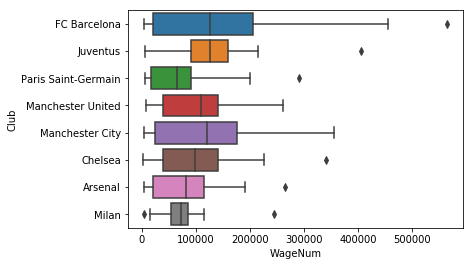

In [47]:
player = pd.read_csv('https://raw.githubusercontent.com/fifa-19-player-stats/data/master/fifa_raw_data.csv',
                     index_col = 0)
def str2number(amount):
    if amount[-1] == 'M':
        return float(amount[1:-1])*1000000
    elif amount[-1] == 'K':
        return float(amount[1:-1])*1000
    else:
        return float(amount[1:])
    

player['ValueNum'] = player['Value'].apply(lambda x: str2number(x))
player['WageNum'] = player['Wage'].apply(lambda x: str2number(x))

clubs = ['FC Barcelona', 'Real Madrid CF', 'Paris Saint-Germain', 'FC Bayern Munich', 'Manchester United',
         'Chelsea', 'Juventus', 'Arsenal', 'Manchester City', 'Milan']





c = player.query('Club in @clubs')

wage1 = sns.boxplot(data = c, y = 'Club', x = 'WageNum')

In [4]:
player.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,ValueNum,WageNum
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M,110500000.0,565000.0
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M,77000000.0,405000.0
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M,118500000.0,290000.0
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M,72000000.0,260000.0
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M,102000000.0,355000.0


In [30]:
nationlist = player.Nationality.unique().tolist()
nationvalues = player.Nationality.value_counts().tolist()
nationlist

['Argentina',
 'Portugal',
 'Brazil',
 'Spain',
 'Belgium',
 'Croatia',
 'Uruguay',
 'Slovenia',
 'Poland',
 'Germany',
 'France',
 'England',
 'Italy',
 'Egypt',
 'Colombia',
 'Denmark',
 'Gabon',
 'Wales',
 'Senegal',
 'Costa Rica',
 'Slovakia',
 'Netherlands',
 'Bosnia Herzegovina',
 'Morocco',
 'Serbia',
 'Algeria',
 'Austria',
 'Greece',
 'Chile',
 'Sweden',
 'Korea Republic',
 'Finland',
 'Guinea',
 'Montenegro',
 'Armenia',
 'Switzerland',
 'Norway',
 'Czech Republic',
 'Scotland',
 'Ghana',
 'Central African Rep.',
 'DR Congo',
 'Ivory Coast',
 'Russia',
 'Ukraine',
 'Iceland',
 'Mexico',
 'Jamaica',
 'Albania',
 'Venezuela',
 'Japan',
 'Turkey',
 'Ecuador',
 'Paraguay',
 'Mali',
 'Nigeria',
 'Cameroon',
 'Dominican Republic',
 'Israel',
 'Kenya',
 'Hungary',
 'Republic of Ireland',
 'Romania',
 'United States',
 'Cape Verde',
 'Australia',
 'Peru',
 'Togo',
 'Syria',
 'Zimbabwe',
 'Angola',
 'Burkina Faso',
 'Iran',
 'Estonia',
 'Tunisia',
 'Equatorial Guinea',
 'New Zealand',

In [45]:
player.Nationality.value_counts()

England                 1662
Germany                 1198
Spain                   1072
Argentina                937
France                   914
Brazil                   827
Italy                    702
Colombia                 618
Japan                    478
Netherlands              453
Sweden                   397
China PR                 392
Chile                    391
Republic of Ireland      368
Mexico                   366
United States            353
Poland                   350
Norway                   341
Saudi Arabia             340
Denmark                  336
Korea Republic           335
Portugal                 322
Turkey                   303
Austria                  298
Scotland                 286
Belgium                  260
Australia                236
Switzerland              220
Uruguay                  149
Senegal                  130
                        ... 
Bermuda                    2
Eritrea                    2
Dominican Republic         2
Nicaragua     